In [ ]:
!pip install haversine

### Importing Libraries

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime, timedelta
from haversine import haversine, Unit
import folium

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


###Reading Capital Bikeshare Data

In [ ]:
file_path = '/content/drive/MyDrive/Capstone Project/Data-Capital'

file_list = os.listdir(file_path)
file_list

['202201-capitalbikeshare-tripdata.csv',
 '202202-capitalbikeshare-tripdata.csv',
 '202203-capitalbikeshare-tripdata.csv',
 '202204-capitalbikeshare-tripdata.csv',
 '202205-capitalbikeshare-tripdata.csv',
 '202206-capitalbikeshare-tripdata.csv',
 '202207-capitalbikeshare-tripdata.csv',
 '202208-capitalbikeshare-tripdata.csv',
 '202209-capitalbikeshare-tripdata.csv',
 '202210-capitalbikeshare-tripdata.csv',
 '202211-capitalbikeshare-tripdata.csv',
 '202212-capitalbikeshare-tripdata.csv']

In [ ]:
capital_df= pd.DataFrame()
#append all files together
for file in file_list:
            df_temp = pd.read_csv(os.path.join(file_path,file))
            df_temp.drop(['ride_id','start_station_id','end_station_id'],axis=1,inplace=True) #Drop the numerical Id columns which doesnot serve in analyzing
            # df_temp = df_temp[df_temp['rideable_type']=='electric_bike']
            capital_df = capital_df.append(df_temp, ignore_index=True)

In [ ]:
capital_df

rideable_type           started_at             ended_at  \
0         classic_bike  2022-01-06 18:39:28  2022-01-06 18:43:03   
1         classic_bike  2022-01-31 19:21:22  2022-01-31 19:27:33   
2         classic_bike  2022-01-07 15:28:39  2022-01-07 15:31:01   
3         classic_bike  2022-01-27 20:09:25  2022-01-27 20:37:02   
4         classic_bike  2022-01-07 16:14:28  2022-01-07 16:16:13   
...                ...                  ...                  ...   
3476777   classic_bike  2022-12-29 11:50:13  2022-12-29 12:00:30   
3476778   classic_bike  2022-12-05 19:14:05  2022-12-05 19:22:10   
3476779  electric_bike  2022-12-05 12:51:38  2022-12-05 12:56:16   
3476780   classic_bike  2022-12-09 17:07:36  2022-12-09 17:14:54   
3476781   classic_bike  2022-12-31 13:11:35  2022-12-31 13:15:39   

                                        start_station_name  \
0                                  Monroe Ave & Leslie Ave   
1                                           14th & L St NW   
2                                           14th & L St NW   
3                              New York Ave & Hecht Ave NE   
4        Falls Church City Hall / Park Ave & Little Fal...   
...                                                    ...   
3476777                                      5th & K St NW   
3476778                                      5th & K St NW   
3476779                                      5th & K St NW   
3476780                                      5th & K St NW   
3476781                                     Tanger Outlets   

                                  end_station_name  start_lat  start_lng  \
0                     Potomac Ave & Main Line Blvd  38.820932 -77.053096   
1                                   10th & G St NW  38.903658 -77.031737   
2                                   12th & L St NW  38.903658 -77.031737   
3        Nannie Helen Burroughs & Minnesota Ave NE  38.915604 -76.983683   
4                      Pennsylvania Ave & Park Ave  38.885434 -77.173605   
...                                            ...        ...        ...   
3476777                   New Jersey Ave & F St NW  38.903040 -77.019027   
3476778                   New Jersey Ave & F St NW  38.903040 -77.019027   
3476779                   New Jersey Ave & F St NW  38.903068 -77.018793   
3476780                   New Jersey Ave & F St NW  38.903040 -77.019027   
3476781                      Oxon Hill Park & Ride  38.796800 -77.002600   

           end_lat    end_lng member_casual  
0        38.822738 -77.049265        member  
1        38.898243 -77.026235        member  
2        38.903819 -77.028400        member  
3        38.901385 -76.941877        casual  
4        38.887403 -77.176992        member  
...            ...        ...           ...  
3476777  38.897108 -77.011616        member  
3476778  38.897108 -77.011616        casual  
3476779  38.897108 -77.011616        casual  
3476780  38.897108 -77.011616        member  
3476781  38.798749 -77.001030        member  

[3476782 rows x 10 columns]

Narrowing the data only to analyze Electric Bike rentals

In [ ]:
capital_df['rideable_type'].value_counts()

classic_bike     2731020
electric_bike     520965
docked_bike       224797
Name: rideable_type, dtype: int64

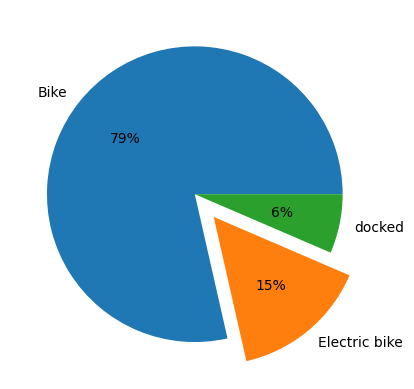

In [ ]:
plt.pie(capital_df['rideable_type'].value_counts(), autopct = '%.0f%%', labels= ['Bike', 'Electric bike', 'docked'], explode = [0,0.2,0])
plt.show()

Electric bikes take around 15 percent of bike share market during the year 2022

In [ ]:
capital_df = capital_df[capital_df['rideable_type']=='electric_bike'] #Filtering rows with electric bike rentals

In [ ]:
capital_df.isna().sum() #checking null values

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    139820
end_station_name      152756
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

In [ ]:
capital_df.head()

rideable_type           started_at             ended_at  \
8   electric_bike  2022-01-08 11:48:59  2022-01-08 11:56:21   
12  electric_bike  2022-01-04 10:38:57  2022-01-04 10:58:20   
14  electric_bike  2022-01-30 15:07:18  2022-01-30 15:13:07   
16  electric_bike  2022-01-18 14:28:53  2022-01-18 14:33:31   
28  electric_bike  2022-01-21 14:38:12  2022-01-21 14:51:30   

               start_station_name  \
8            14th & Harvard St NW   
12    Adams Mill & Columbia Rd NW   
14                 13th & E St SE   
16  Connecticut & Nebraska Ave NW   
28                 13th & U St NW   

                                end_station_name  start_lat  start_lng  \
8                     Calvert St & Woodley Pl NW  38.926775 -77.032137   
12                                           NaN  38.923056 -77.042543   
14  Eastern Market / 7th & North Carolina Ave SE  38.882921 -76.987862   
16  Tenleytown / Wisconsin Ave & Albemarle St NW  38.955075 -77.070026   
28                                 5th & F St NW  38.916804 -77.029828   

      end_lat    end_lng member_casual  
8   38.923583 -77.050046        casual  
12  38.900000 -77.030000        member  
14  38.886952 -76.996806        member  
16  38.947607 -77.079382        member  
28  38.897222 -77.019347        member

As we can see that there are around 140k records in which there is not a start station or end station. 

There is convinience factor in CaBi system, that users can leave the bike wherever they want (without docking).

Filling out the missing values as Not Docked gives some meaning to it

In [ ]:
capital_df['start_station_name'].fillna('Not_docked',inplace=True)
capital_df['end_station_name'].fillna('Not_docked',inplace=True)


#### KMeans Clustering

As it will a tough job to predict the demand at each station, It is better we divide them into clusters and predict the demand in a cluster.

The clustering is done using KMeans algorithm based on the coordinates

In [ ]:
cluster_formation = capital_df[['start_station_name','start_lat','start_lng']]

In [ ]:
cluster_formation

start_station_name  start_lat  start_lng
8                         14th & Harvard St NW  38.926775 -77.032137
12                 Adams Mill & Columbia Rd NW  38.923056 -77.042543
14                              13th & E St SE  38.882921 -76.987862
16               Connecticut & Nebraska Ave NW  38.955075 -77.070026
28                              13th & U St NW  38.916804 -77.029828
...                                        ...        ...        ...
3476684          Wisconsin Ave & Ingomar St NW  38.958238 -77.084617
3476698  Ballston Metro / Stuart St & 9th St N  38.881045 -77.111758
3476712  Ballston Metro / Stuart St & 9th St N  38.881058 -77.111858
3476739                 Oklahoma Ave & D St NE  38.894445 -76.974944
3476779                          5th & K St NW  38.903068 -77.018793

[520965 rows x 3 columns]

In [ ]:
K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = cluster_formation[['start_lat']]
X_axis = cluster_formation[['start_lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize


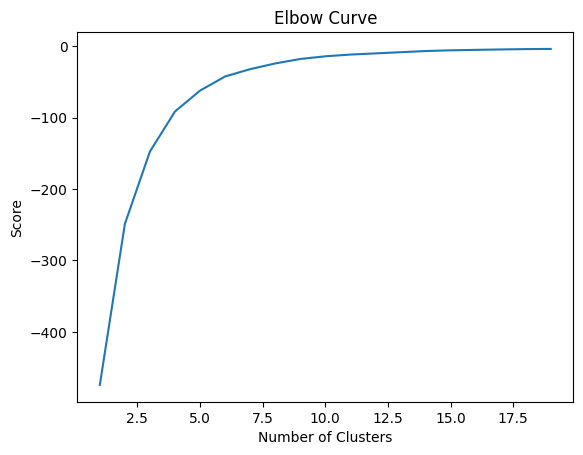

In [ ]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Observing this elbow graph, even though the significance seems to end at 5 clusters, the data is divided into 8 clusters for better flexibility

In [ ]:
kmeans = KMeans(n_clusters = 8, init ='k-means++')
kmeans.fit(cluster_formation[cluster_formation.columns[1:3]]) # Compute k-means clustering.
cluster_formation['cluster_label'] = kmeans.fit_predict(cluster_formation[cluster_formation.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(cluster_formation[cluster_formation.columns[1:3]]) # Labels of each point
cluster_formation.head(10)

start_station_name  start_lat  start_lng  cluster_label
8            14th & Harvard St NW  38.926775 -77.032137              6
12    Adams Mill & Columbia Rd NW  38.923056 -77.042543              6
14                 13th & E St SE  38.882921 -76.987862              3
16  Connecticut & Nebraska Ave NW  38.955075 -77.070026              5
28                 13th & U St NW  38.916804 -77.029828              6
37                  1st & K St NE  38.902425 -77.005715              3
38                  1st & K St NE  38.902848 -77.005689              3
45                 14th & L St NW  38.903695 -77.031401              1
51                 14th & L St NW  38.903755 -77.031935              1
58          Wakefield High School  38.847151 -77.112522              2

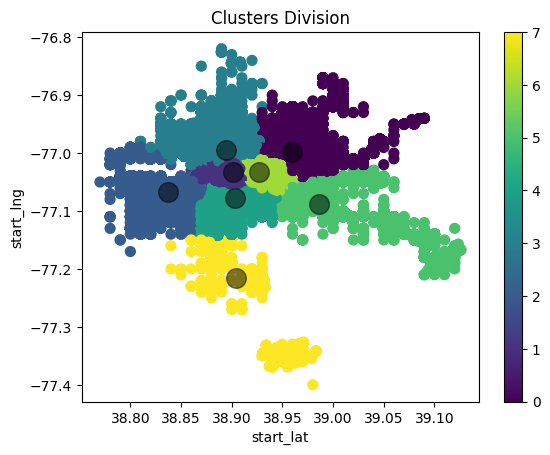

In [ ]:
cluster_formation.plot.scatter(x = 'start_lat', y = 'start_lng', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clusters Division')
plt.show()

In [ ]:
cf = cluster_formation.drop_duplicates('start_station_name').reset_index(drop=True)

In [ ]:
map = folium.Map(location=[cf['start_lat'][1], cf['start_lng'][1]], zoom_start=4)

# Add markers for each latitude-longitude point, with marker color based on the cluster label
colors = ['red', 'blue', 'green','yellow','black','lightblue','orange','gray','lightgray']
for index, row in cf.iterrows():
    color = colors[row['cluster_label']]
    folium.Marker([row['start_lat'], row['start_lng']], icon=folium.Icon(color=color)).add_to(map)

# Display the map
map

In [ ]:
capital_df = capital_df.merge(cluster_formation['cluster_label'], left_index=True, right_index=True)

In [ ]:
def distance(a):

  point1 = (a[0],a[1])
  point2 = (a[2],a[3])
  distance = haversine(point1, point2, unit=Unit.MILES)

  return distance

Distance Travelled is calculated using Haversine Distance formula, it gives the distance between two co-ordinates

In [ ]:
capital_df['Distance_travelled'] = capital_df[['start_lat','start_lng','end_lat','end_lng']].apply(distance,axis=1)

In [ ]:
capital_df['started_at'] = capital_df['started_at'].astype('datetime64[ns]')
capital_df['ended_at'] = capital_df['ended_at'].astype('datetime64[ns]')

In [ ]:
#Creating new columns from the existing datetime column

capital_df['start_date'] = capital_df['started_at'].dt.date
capital_df['end_date'] =  capital_df['ended_at'].dt.date
capital_df['start_time'] = capital_df['started_at'].dt.time
capital_df['end_time'] = capital_df['ended_at'].dt.time
capital_df['start_hour'] = capital_df['started_at'].dt.hour
capital_df['end_hour'] = capital_df['ended_at'].dt.hour
capital_df['start_minute'] = capital_df['started_at'].dt.minute


In [ ]:
def quater(x):
  if x in list(range(0,15)):
    return 1
  elif x in list(range(15,30)):
    return 2
  elif x in list(range(30,45)):
    return 3
  else: return 4

In [ ]:
capital_df['quater_hour'] = capital_df['start_minute'].apply(quater) #We are predicting the demand usage for every quater in an hour(00,15,30,45 minutes)

In [ ]:
capital_df.reset_index(drop=True, inplace=True)

In [ ]:
capital_df['start_station_name'].value_counts()

Not_docked                                139820
14th & Irving St NW                         3838
Lamont & Mt Pleasant NW                     3632
Adams Mill & Columbia Rd NW                 3474
1st & M St NE                               3259
                                           ...  
S George Mason Dr & S Four Mile Run Dr         1
South Dakota Ave & 33rd St NE                  1
South Dakota Ave & Bladensburg Rd NE           1
Briggs Chaney Park & Ride                      1
S Troy St & 26th St S                          1
Name: start_station_name, Length: 745, dtype: int64

In [ ]:
# print((capital_df['ended_at'][8]-capital_df['started_at'][8]).seconds)
def minutes (x):
  minutes = int((x[0]-x[1])/ timedelta(minutes=1))
  return minutes

In [ ]:
# capital_df['minutes_travelled'] = 
capital_df['minutes_travelled'] = capital_df[['ended_at','started_at']].apply(minutes,axis=1) #By using both the start time and end time, we could create a new column that shows how many minutes each travelled

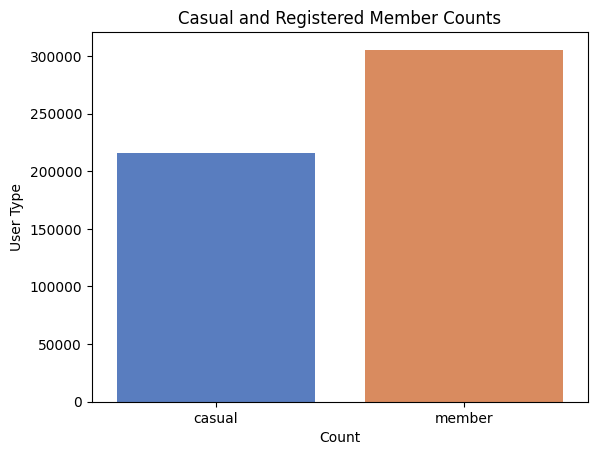

In [ ]:
sns.countplot(data=capital_df, x='member_casual',palette="muted")

# Set the axis labels and title
plt.xlabel("Count")
plt.ylabel("User Type")
plt.title("Casual and Registered Member Counts")
plt.show()


In [ ]:
top10_start_stations = capital_df['start_station_name'].value_counts()[1:20]
top10_end_stations = capital_df['end_station_name'].value_counts()[1:20]

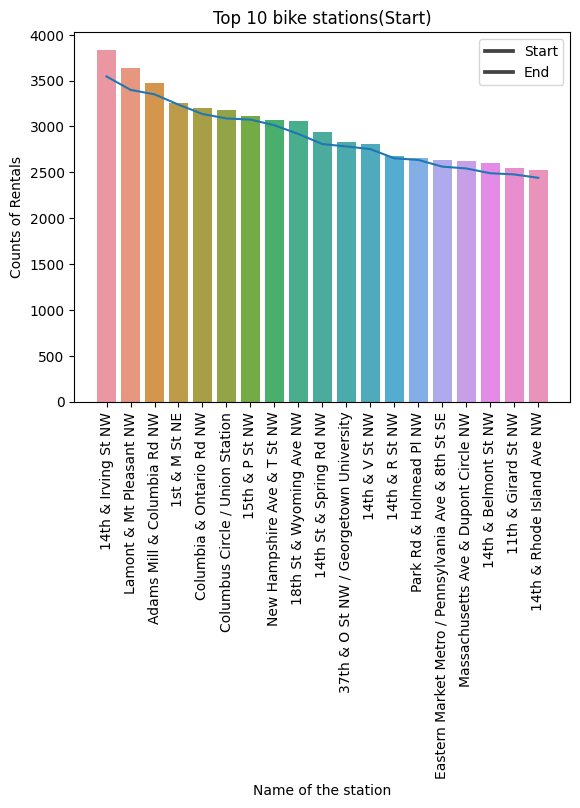

In [ ]:
sns.barplot(x=top10_start_stations.index, y=top10_start_stations.values)
sns.lineplot(x=top10_end_stations.index, y=top10_end_stations.values)
plt.xticks(rotation = 90)
plt.xlabel('Name of the station')
plt.ylabel('Counts of Rentals')
plt.title('Top 10 bike stations(Start)')
plt.legend(['Start','End'])
plt.show()

These 20 stations are the busiest station in the Dc Downtown area. These areas has a lot of corporate companies

In [ ]:
# sns.barplot(x=top10_end_stations.index, y=top10_end_stations.values)
# plt.xticks(rotation = 90)
# plt.xlabel('Name of the station')
# plt.ylabel('Counts of Rentals')
# plt.title('Top 10 bike stations(End)')
# plt.show()

In [ ]:
c = capital_df[(capital_df['Day_of_week'] != 'Saturday') & (capital_df['Day_of_week'] != 'Sunday')]
d = capital_df[~((capital_df['Day_of_week'] != 'Saturday') & (capital_df['Day_of_week'] != 'Sunday'))]

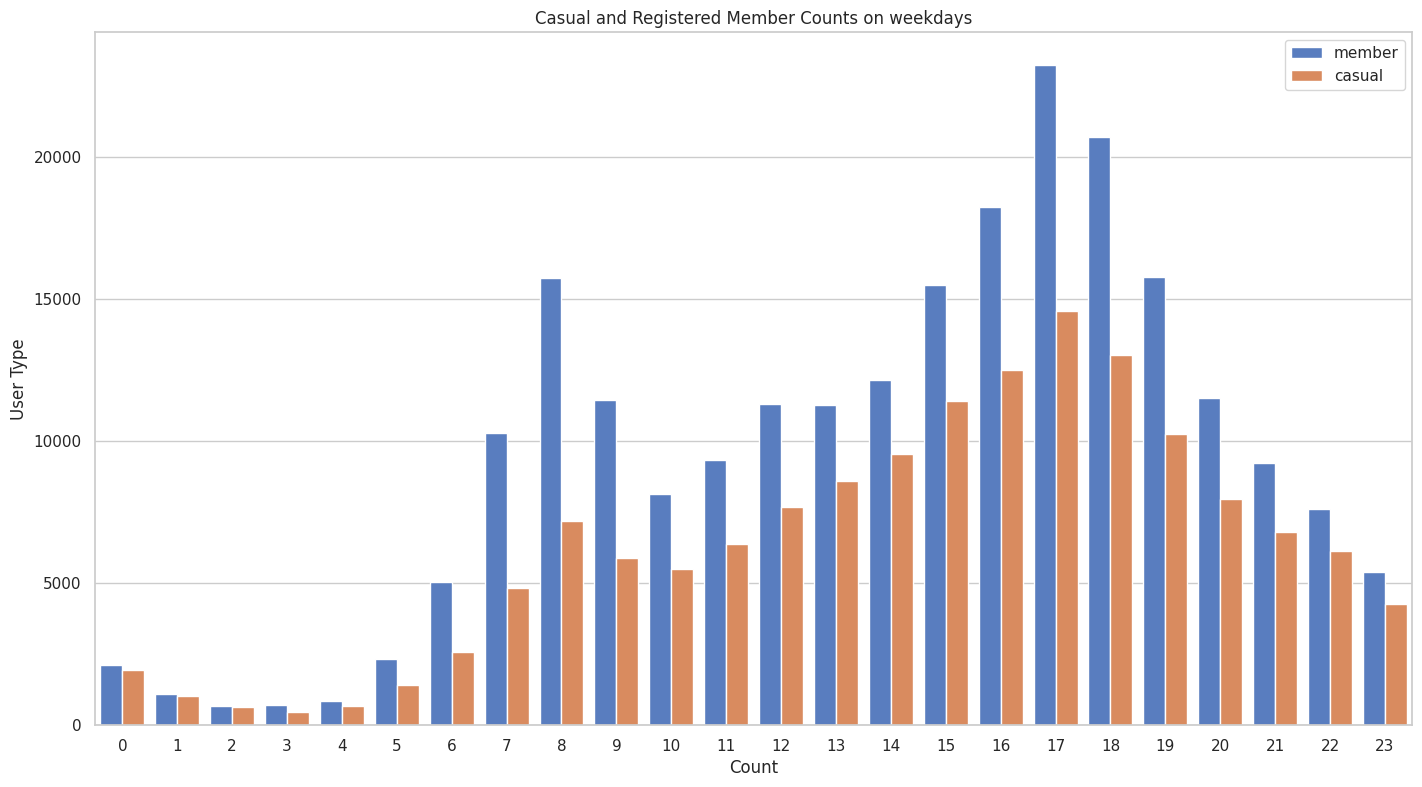

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(17,9))
sns.countplot(data=c, hue='member_casual',x='start_hour',palette="muted")
# Set the axis labels and title
plt.xlabel("Count")
plt.ylabel("User Type")
plt.title("Casual and Registered Member Counts on weekdays")
plt.legend(['member', 'casual'])
plt.show()


This plot shows that the higher rentals in the morning occur during the hours 8-9. The evening peak was around 5-7. This time is generally the starting and end of the working hours for many comapnies (9-5)

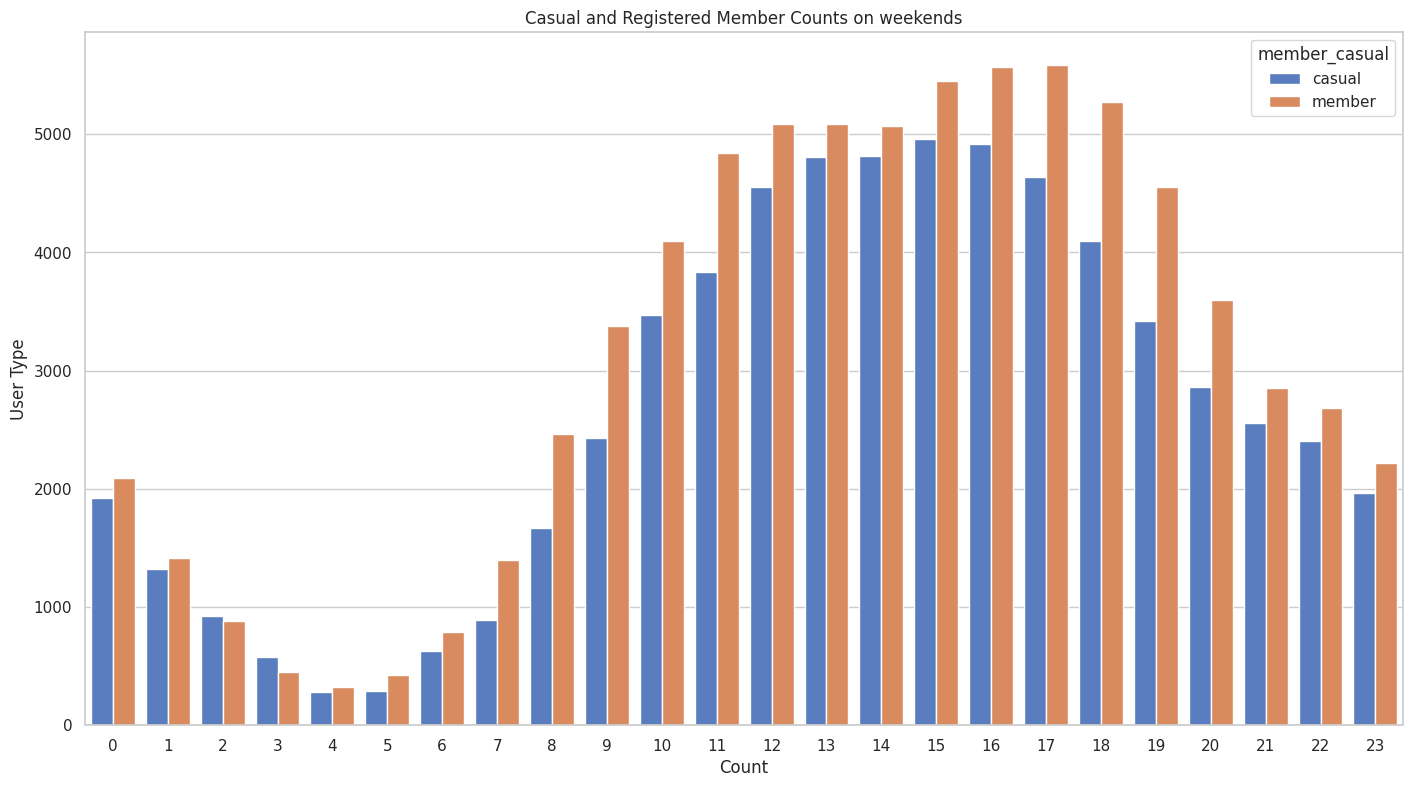

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(17,9))
sns.countplot(data=d, hue='member_casual',x='start_hour',palette="muted")
# Set the axis labels and title
plt.xlabel("Count")
plt.ylabel("User Type")
plt.title("Casual and Registered Member Counts on weekends")
plt.show()


Where as in weekends, there is no sudden surge, but a constant incrase in usage, as people waiting for the day to beging to travel D.C. with electric bikes.

Observing both these graphs it is evident that most people rent the bikes to commmute to their working place

In [ ]:
capital_df.Distance_travelled.value_counts()

0.000000    20600
0.690934     4757
0.690934     1357
0.537639      991
1.381868      979
            ...  
5.344638        1
1.209085        1
0.549466        1
6.263573        1
0.564360        1
Name: Distance_travelled, Length: 402024, dtype: int64

In [ ]:
capital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520965 entries, 0 to 520964
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       520965 non-null  object        
 1   started_at          520965 non-null  datetime64[ns]
 2   ended_at            520965 non-null  datetime64[ns]
 3   start_station_name  520965 non-null  object        
 4   end_station_name    520965 non-null  object        
 5   start_lat           520965 non-null  float64       
 6   start_lng           520965 non-null  float64       
 7   end_lat             520965 non-null  float64       
 8   end_lng             520965 non-null  float64       
 9   member_casual       520965 non-null  object        
 10  cluster_label       520965 non-null  int32         
 11  Distance_travelled  520965 non-null  float64       
 12  start_date          520965 non-null  object        
 13  end_date            520965 no

<Axes: xlabel='Distance_travelled'>

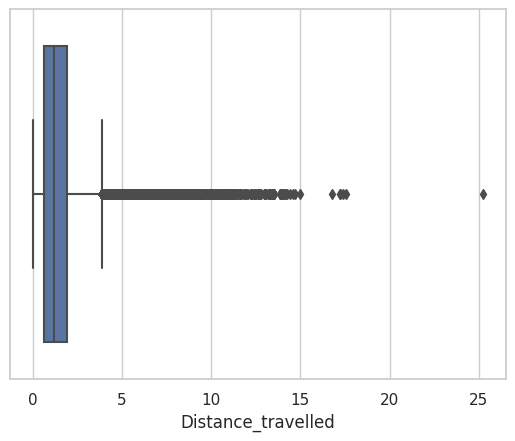

In [ ]:
sns.boxplot(x=capital_df["Distance_travelled"])


Most people use the bikes to travel less than 5miles from the starting point. Which for an electric bike with an avg speed of 15-20mph. should get them in around 20 minutes

<Axes: xlabel='Distance_travelled', ylabel='Count'>

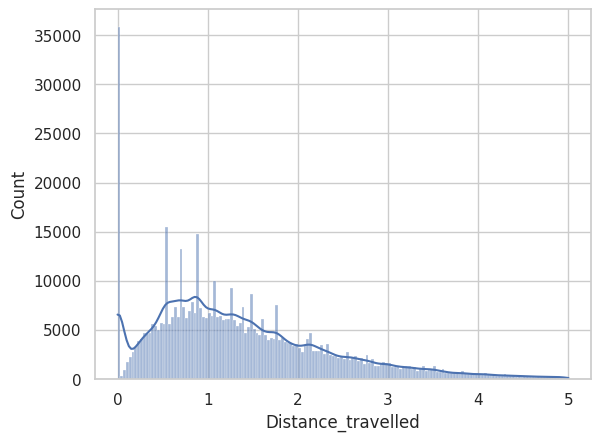

In [ ]:
# Filter the data to exclude outliers
no_outliers = capital_df[capital_df["Distance_travelled"] < 5]
sns.histplot(no_outliers['Distance_travelled'],kde=True)

<Axes: ylabel='minutes_travelled'>

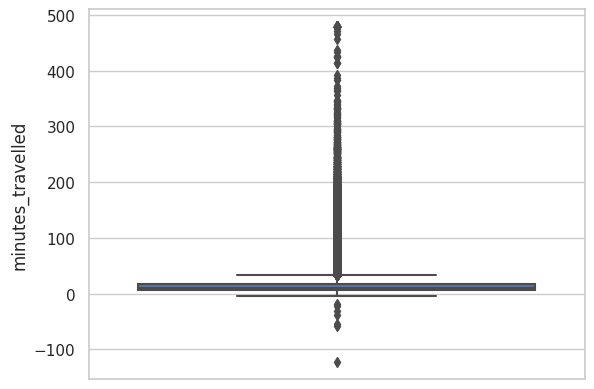

In [ ]:
sns.boxplot(y=capital_df["minutes_travelled"])


<Axes: xlabel='minutes_travelled', ylabel='Count'>

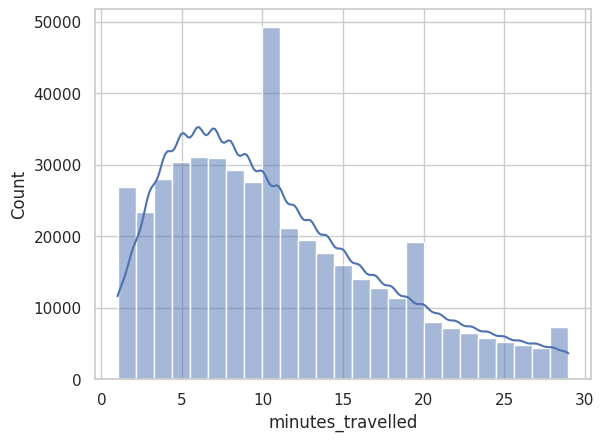

In [ ]:
no_outliers = capital_df[(capital_df['minutes_travelled'] > 0)  & (capital_df['minutes_travelled'] < 30)]
sns.histplot(no_outliers['minutes_travelled'],kde=True, bins=25)

As predicted earlier, most people rent the bikes for about 10-20 minutes only. Which serves for a very short commute

<Axes: >

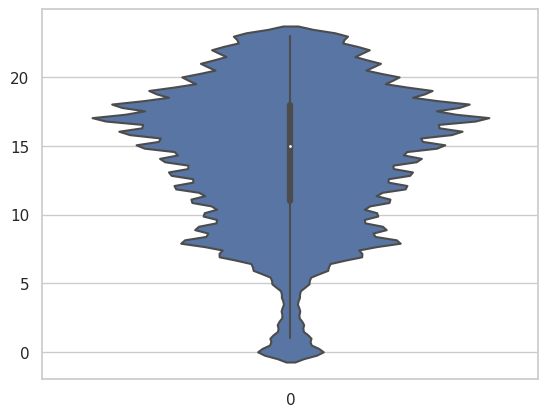

In [ ]:
sns.violinplot(capital_df['start_hour'])

In [ ]:
capital_df['start_month'] = capital_df['started_at'].dt.month

<Axes: xlabel='start_month', ylabel='count'>

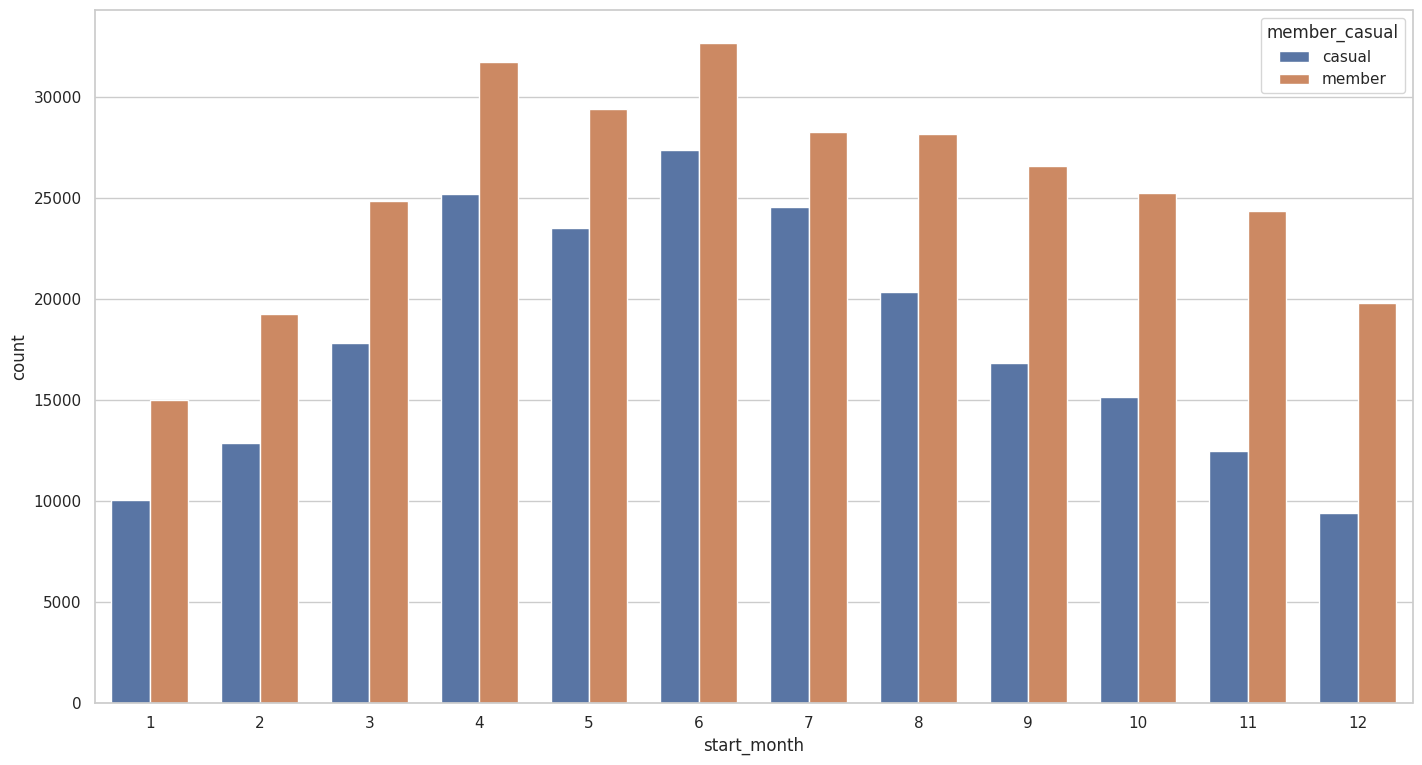

In [ ]:
plt.figure(figsize=(17,9))
sns.countplot(capital_df, x='start_month', hue='member_casual',width = 0.7)

Looking at the monthly statistics, it is clear that the usafe declines sightly after the summer and incrases during the months of march and april which is the starting for the Cherry Blossom season

<Axes: >

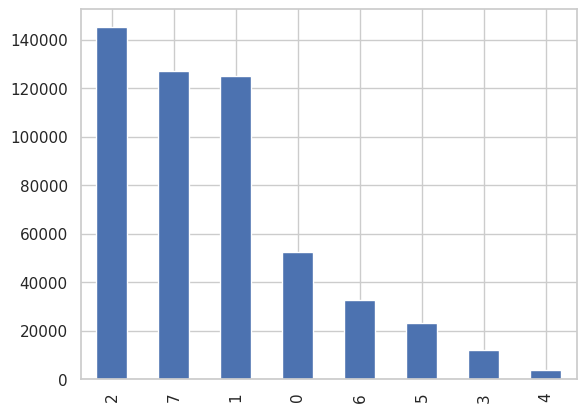

In [ ]:
capital_df['cluster_label'].value_counts().plot(kind='bar')

In [ ]:
start = capital_df[capital_df['cluster_label'] == 2][['start_station_name','start_lat','start_lng']].drop_duplicates('start_station_name').reset_index(drop=True)
end = capital_df[capital_df['cluster_label'] == 2][['end_station_name','end_lat','end_lng']].drop_duplicates('end_station_name').reset_index(drop=True)

In [ ]:
start.shape, end.shape

((118, 3), (583, 3))

In [ ]:
start

start_station_name  start_lat  start_lng
0                       14th & L St NW  38.903695 -77.031401
1             New Jersey Ave & R St NW  38.912718 -77.017541
2    Rhode Island & Connecticut Ave NW  38.905773 -77.039828
3                       11th & M St NW  38.905574 -77.027322
4                       14th & Q St NW  38.910812 -77.031888
..                                 ...        ...        ...
113          Walter Reed Dr & 8th St S  38.902588 -77.017568
114                    Waterfront Park  38.874816 -77.020774
115        Adams Mill & Columbia Rd NW  38.907119 -77.041507
116                      7th & S St NW  38.913904 -77.021510
117                      7th & T St NW  38.913652 -77.016221

[118 rows x 3 columns]

In [ ]:
map = folium.Map(location=[start['start_lat'][31], start['start_lng'][31]], zoom_start=4)

# Add markers for each latitude-longitude point, with marker color based on the cluster label
for index, row in start.iterrows():
    folium.Marker([row['start_lat'], row['start_lng']], icon=folium.Icon()).add_to(map)

# Display the map
map

While most people rent their bikes in the downtown area, they return them in a different places other than downtown. Downtown area is the starting point

In [ ]:
end

In [ ]:
map = folium.Map(location=[end['end_lat'][31], end['end_lng'][31]], zoom_start=4)

# Add markers for each latitude-longitude point, with marker color based on the cluster label
for index, row in end.iterrows():
    folium.Marker([row['end_lat'], row['end_lng']], icon=folium.Icon()).add_to(map)

# Display the map
map

In [ ]:
capital_df['Day_of_week'] = capital_df['started_at'].apply(lambda x : x.strftime('%A'))

<Axes: >

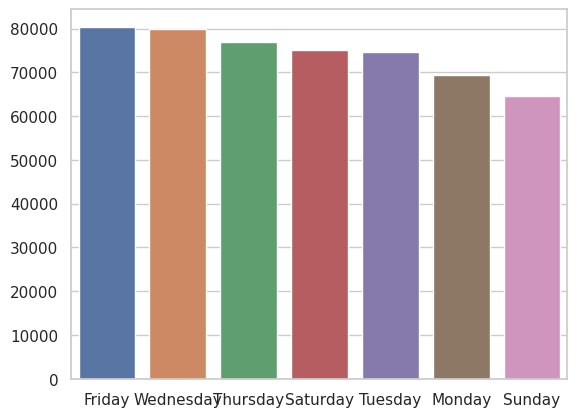

In [ ]:
sns.barplot(x=capital_df['Day_of_week'].value_counts().index, y=capital_df['Day_of_week'].value_counts().values)

Surpringingly, the rentals are peaked during the weeekdays than the weekends. Friday seems to have the higher rental counts

In [ ]:
capital_df.reset_index(inplace=True)

In [ ]:
count_quaterhour = pd.DataFrame(capital_df.groupby(['start_date','cluster_label','start_hour','quater_hour']).count()['rideable_type'])
count_quaterhour

rideable_type
start_date cluster_label start_hour quater_hour               
2022-01-01 0             0          1                        1
                                    2                        2
                         1          1                        1
                                    4                        3
                         2          1                        1
...                                                        ...
2022-12-31 7             22         3                        1
                                    4                        2
                         23         1                        1
                                    2                        4
                                    3                        1

[149163 rows x 1 columns]

In [ ]:
sum_distance_minutes = pd.DataFrame(capital_df.groupby(['start_date','cluster_label','start_hour','quater_hour']).sum()[['Distance_travelled','minutes_travelled']])

In [ ]:
sum_distance_minutes

Distance_travelled  \
start_date cluster_label start_hour quater_hour                       
2022-01-01 0             0          1                      2.915062   
                                    2                      0.673249   
                         1          1                      0.401791   
                                    4                      7.625466   
                         2          1                      3.158227   
...                                                             ...   
2022-12-31 7             22         3                      1.113387   
                                    4                      1.309904   
                         23         1                      0.848171   
                                    2                      5.508349   
                                    3                      2.056406   

                                                 minutes_travelled  
start_date cluster_label start_hour quater_hour                     
2022-01-01 0             0          1                           16  
                                    2                            8  
                         1          1                            4  
                                    4                           54  
                         2          1                           17  
...                                                            ...  
2022-12-31 7             22         3                            9  
                                    4                            9  
                         23         1                           26  
                                    2                           73  
                                    3                           11  

[149163 rows x 2 columns]

####Creating a dataframe where we aggregate the sum, distance travelled and minutes travelled

In [ ]:
def seasons(number):
  if number in [3,4,5]: return 'Spring'
  elif number in [6,7,8]: return 'Summer'
  elif number in [9,10,11]: return 'Fall'
  else: return 'Winter'

capital_df['season'] = capital_df['start_month'].apply(seasons)

In [ ]:
misc = capital_df[['start_date','Day_of_week','season']].drop_duplicates('start_date').set_index('start_date')

In [ ]:
rental_dataframe = count_quaterhour.merge(sum_distance_minutes,left_index=True,right_index=True).reset_index().merge(misc, on='start_date')

In [ ]:
rental_dataframe

start_date  cluster_label  start_hour  quater_hour  rideable_type  \
0       2022-01-01              0           0            1              1   
1       2022-01-01              0           0            2              2   
2       2022-01-01              0           1            1              1   
3       2022-01-01              0           1            4              3   
4       2022-01-01              0           2            1              1   
...            ...            ...         ...          ...            ...   
149158  2022-12-31              7          22            3              1   
149159  2022-12-31              7          22            4              2   
149160  2022-12-31              7          23            1              1   
149161  2022-12-31              7          23            2              4   
149162  2022-12-31              7          23            3              1   

        Distance_travelled  minutes_travelled Day_of_week  season  
0                 2.915062                 16    Saturday  Winter  
1                 0.673249                  8    Saturday  Winter  
2                 0.401791                  4    Saturday  Winter  
3                 7.625466                 54    Saturday  Winter  
4                 3.158227                 17    Saturday  Winter  
...                    ...                ...         ...     ...  
149158            1.113387                  9    Saturday  Winter  
149159            1.309904                  9    Saturday  Winter  
149160            0.848171                 26    Saturday  Winter  
149161            5.508349                 73    Saturday  Winter  
149162            2.056406                 11    Saturday  Winter  

[149163 rows x 9 columns]

In [ ]:
rental_dataframe.isna().sum()

start_date            0
cluster_label         0
start_hour            0
quater_hour           0
rideable_type         0
Distance_travelled    0
minutes_travelled     0
Day_of_week           0
season                0
dtype: int64

####Reading station level data, that included docks, bikes available and so on...

In [ ]:
station_data = pd.read_csv('/content/drive/MyDrive/Capstone Project/Capital_Bikeshare_Locations.csv')

In [ ]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   X                               724 non-null    float64
 1   Y                               724 non-null    float64
 2   NAME                            724 non-null    object 
 3   STATION_TYPE                    724 non-null    object 
 4   STATION_ID                      724 non-null    object 
 5   STATION_STATUS                  724 non-null    object 
 6   LAST_REPORTED                   724 non-null    object 
 7   NUM_DOCKS_AVAILABLE             724 non-null    int64  
 8   NUM_DOCKS_DISABLED              724 non-null    int64  
 9   NUM_BIKES_AVAILABLE             724 non-null    int64  
 10  NUM_EBIKES_AVAILABLE            724 non-null    int64  
 11  NUM_BIKES_DISABLED              724 non-null    int64  
 12  IS_INSTALLED                    724 

In [ ]:
station_data = station_data[['NAME','NUM_DOCKS_AVAILABLE','NUM_DOCKS_DISABLED','NUM_EBIKES_AVAILABLE','LATITUDE','LONGITUDE','CAPACITY']]
station_data.head()

NAME  NUM_DOCKS_AVAILABLE  NUM_DOCKS_DISABLED  \
0                 20th & E St NW                   12                   1   
1  Temporary Rd & Old Reston Ave                   15                   0   
2          Capitol Heights Metro                   12                   0   
3       Fairfax Dr & Wilson Blvd                    9                   0   
4     Washington Blvd & 7th St N                    9                   0   

   NUM_EBIKES_AVAILABLE   LATITUDE  LONGITUDE  CAPACITY  
0                     0  38.896300 -77.045000        15  
1                     0  38.960084 -77.353414        15  
2                     0  38.888524 -76.913188        19  
3                     2  38.885801 -77.097745        12  
4                     2  38.880810 -77.090792        12

In [ ]:
station_data['CAPACITY'].sum()

12487

In [ ]:
cluster_station = capital_df[['start_station_name','cluster_label']].merge(station_data, left_on='start_station_name', right_on = 'NAME').groupby('start_station_name').mean().reset_index(drop=True) \
                                                         [['cluster_label','NUM_DOCKS_AVAILABLE','NUM_DOCKS_DISABLED','NUM_EBIKES_AVAILABLE','CAPACITY']]

# [['cluster_label','NUM_DOCKS_AVAILABLE','NUM_DOCKS_AVAILABLE','NUM_EBIKES_AVAILABLE','CAPACITY']]
cluster_station['cluster_label'] = cluster_station['cluster_label'].astype(int)
cluster_station = cluster_station.groupby('cluster_label').sum().reset_index()

####Reading the hourly weather data, it contains 365*24 rows

In [ ]:
weather_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Weather_hourly.csv')

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wdir              8758 non-null   float64
 1   temp              8760 non-null   float64
 2   maxt              8760 non-null   float64
 3   visibility        8760 non-null   float64
 4   wspd              8760 non-null   float64
 5   datetimeStr       8760 non-null   object 
 6   solarenergy       4903 non-null   float64
 7   heatindex         1049 non-null   float64
 8   cloudcover        8760 non-null   float64
 9   mint              8760 non-null   float64
 10  datetime          8760 non-null   int64  
 11  precip            8760 non-null   float64
 12  solarradiation    4903 non-null   float64
 13  weathertype       1106 non-null   object 
 14  snowdepth         47 non-null     float64
 15  sealevelpressure  8760 non-null   float64
 16  snow              0 non-null      float64


In [ ]:
weather_df['datetime'] = weather_df['datetime'].apply(lambda x: datetime.fromtimestamp(x / 1000))

In [ ]:
weather_df.drop(['datetimeStr','heatindex','snowdepth','snow','dew','wgust','windchill','info','solarenergy'], axis=1, inplace=True)
weather_df.drop(['precipcover'], axis=1, inplace=True)

In [ ]:
mydict = {}

for i in weather_df['weathertype']:
  if pd.isna(i):
    continue
  item = i.split(",")
  for j in item:
    j = j.strip() # remove any leading/trailing whitespace
    if j in mydict:
      mydict[j] += 1
    else:
      mydict[j] = 1

mydict


{'Mist': 535,
 'Fog': 74,
 'Light Drizzle': 171,
 'Light Rain': 595,
 'Rain': 132,
 'Heavy Rain': 125,
 'Ice': 5,
 'Light Snow': 55,
 'Light Rain And Snow': 3,
 'Snow': 10,
 'Heavy Snow': 3,
 'Light Freezing Rain': 5,
 'Light Freezing Drizzle/Freezing Rain': 4,
 'Drizzle': 2,
 'Heavy Drizzle': 2,
 'Smoke Or Haze': 16,
 'Rain Showers': 1,
 'Thunderstorm': 51,
 'Lightning Without Thunder': 46,
 'Squalls': 1}

In [ ]:
weather_df.isna().sum()

wdir                   2
temp                   0
maxt                   0
visibility             0
wspd                   0
cloudcover             0
mint                   0
datetime               0
precip                 0
solarradiation      3857
weathertype         7654
sealevelpressure       0
humidity               0
conditions             0
dtype: int64

In [ ]:
weather_df.drop(['weathertype'], axis=1, inplace=True)

In [ ]:
((weather_df['maxt'] == weather_df['temp']) & weather_df['temp'] == weather_df['mint']).sum()

0

In [ ]:
weather_df.drop(['maxt','mint'],axis=1,inplace=True)

In [ ]:
weather_df

wdir  temp  visibility  wspd  cloudcover            datetime  precip  \
0     178.0  54.6         9.9   5.8        99.8 2022-01-01 00:00:00    0.00   
1     188.0  55.1         4.4   5.9       100.0 2022-01-01 01:00:00    0.00   
2     170.0  54.1         6.5   8.1       100.0 2022-01-01 02:00:00    0.00   
3     186.0  56.0         6.5   5.9       100.0 2022-01-01 03:00:00    0.00   
4     182.0  56.1         6.6   6.8       100.0 2022-01-01 04:00:00    0.00   
...     ...   ...         ...   ...         ...                 ...     ...   
8755  211.0  56.1         4.0   5.9       100.0 2022-12-31 19:00:00    0.06   
8756  187.0  55.2         1.6   8.1       100.0 2022-12-31 20:00:00    0.02   
8757  222.0  56.1         5.3   5.2       100.0 2022-12-31 21:00:00    0.02   
8758  291.0  54.9         5.3   3.9        95.2 2022-12-31 22:00:00    0.00   
8759  225.0  54.9         7.5   5.6        94.4 2022-12-31 23:00:00    0.00   

      solarradiation  sealevelpressure  humidity      conditions  
0                NaN            1011.2     93.17        Overcast  
1                NaN            1010.9     90.31        Overcast  
2                5.0            1010.8     93.78        Overcast  
3               11.0            1010.8     90.60        Overcast  
4                NaN            1010.2     90.65        Overcast  
...              ...               ...       ...             ...  
8755             NaN            1011.4     96.77  Rain, Overcast  
8756             NaN            1010.7     95.94  Rain, Overcast  
8757             NaN            1011.2     96.93  Rain, Overcast  
8758             NaN            1010.4     96.73        Overcast  
8759             NaN            1010.9     96.22        Overcast  

[8760 rows x 11 columns]

In [ ]:
weather_df['solarradiation'].describe()

count    4903.000000
mean      160.193147
std       210.052719
min         0.000000
25%        21.000000
50%        69.000000
75%       203.500000
max      1043.000000
Name: solarradiation, dtype: float64

In [ ]:
weather_df["solarradiation"] = weather_df["solarradiation"].interpolate(method='linear', limit_direction='forward', axis=0)


In [ ]:
weather_df['solarradiation'] = weather_df['solarradiation'].fillna(5.0)

In [ ]:
weather_df['hour'] = weather_df['datetime'].dt.hour

In [ ]:
weather_df['datetime'] = weather_df['datetime'].dt.date
weather_df['datetime'] = weather_df['datetime'].astype('datetime64[ns]')

In [ ]:
weather_df

wdir  temp  visibility  wspd  cloudcover   datetime  precip  \
0     178.0  54.6         9.9   5.8        99.8 2022-01-01    0.00   
1     188.0  55.1         4.4   5.9       100.0 2022-01-01    0.00   
2     170.0  54.1         6.5   8.1       100.0 2022-01-01    0.00   
3     186.0  56.0         6.5   5.9       100.0 2022-01-01    0.00   
4     182.0  56.1         6.6   6.8       100.0 2022-01-01    0.00   
...     ...   ...         ...   ...         ...        ...     ...   
8755  211.0  56.1         4.0   5.9       100.0 2022-12-31    0.06   
8756  187.0  55.2         1.6   8.1       100.0 2022-12-31    0.02   
8757  222.0  56.1         5.3   5.2       100.0 2022-12-31    0.02   
8758  291.0  54.9         5.3   3.9        95.2 2022-12-31    0.00   
8759  225.0  54.9         7.5   5.6        94.4 2022-12-31    0.00   

      solarradiation  sealevelpressure  humidity      conditions  hour  
0                5.0            1011.2     93.17        Overcast     0  
1                5.0            1010.9     90.31        Overcast     1  
2                5.0            1010.8     93.78        Overcast     2  
3               11.0            1010.8     90.60        Overcast     3  
4                9.8            1010.2     90.65        Overcast     4  
...              ...               ...       ...             ...   ...  
8755             0.0            1011.4     96.77  Rain, Overcast    19  
8756             0.0            1010.7     95.94  Rain, Overcast    20  
8757             0.0            1011.2     96.93  Rain, Overcast    21  
8758             0.0            1010.4     96.73        Overcast    22  
8759             0.0            1010.9     96.22        Overcast    23  

[8760 rows x 12 columns]

In [ ]:
rental_dataframe['start_date']= rental_dataframe['start_date'].astype('datetime64[ns]')

In [ ]:
rental_dataframe = rental_dataframe.merge(weather_df, left_on=['start_date','start_hour'],right_on=['datetime','hour']).drop(['datetime','hour'],axis=1)


In [ ]:
rental_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149183 entries, 0 to 149182
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_date          149183 non-null  datetime64[ns]
 1   cluster_label       149183 non-null  int64         
 2   start_hour          149183 non-null  int64         
 3   quater_hour         149183 non-null  int64         
 4   rideable_type       149183 non-null  int64         
 5   Distance_travelled  149183 non-null  float64       
 6   minutes_travelled   149183 non-null  int64         
 7   Day_of_week         149183 non-null  object        
 8   season              149183 non-null  object        
 9   wdir                149161 non-null  float64       
 10  temp                149183 non-null  float64       
 11  visibility          149183 non-null  float64       
 12  wspd                149183 non-null  float64       
 13  cloudcover          149183 no

In [ ]:
cluster_station

cluster_label  NUM_DOCKS_AVAILABLE  NUM_DOCKS_DISABLED  \
0              0                820.0                 2.0   
1              1               1240.0                 7.0   
2              2               1269.0                 9.0   
3              3                714.0                 2.0   
4              4                418.0                 0.0   
5              5                729.0                 5.0   
6              6                760.0                 6.0   
7              7                557.0                 4.0   

   NUM_EBIKES_AVAILABLE  CAPACITY  
0                  61.0    1265.0  
1                 121.0    2787.0  
2                  47.0    2130.0  
3                  29.0    1063.0  
4                  37.0     794.0  
5                 117.0    1728.0  
6                  95.0    1254.0  
7                  83.0     943.0

In [ ]:
cluster_station.rename(columns= {'NUM_DOCKS_AVAILABLE':'num_docks_available','CAPACITY':'capacity','NUM_DOCKS_DISABLED':'num_docks_disabled','NUM_EBIKES_AVAILABLE':'num_ebikes_available'},inplace=True)

In [ ]:
rental_dataframe = rental_dataframe.merge(cluster_station, on='cluster_label')

In [ ]:
rental_dataframe.rename(columns = {'rideable_type':'count_of_bikes_quater'},inplace=True)

In [ ]:
rental_dataframe['cluster_label'].value_counts()

7    29190
1    27813
2    27304
0    21116
6    17755
5    13905
3     8959
4     3141
Name: cluster_label, dtype: int64

In [ ]:
rental_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149183 entries, 0 to 149182
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   start_date             149183 non-null  datetime64[ns]
 1   cluster_label          149183 non-null  int64         
 2   start_hour             149183 non-null  int64         
 3   quater_hour            149183 non-null  int64         
 4   count_of_bikes_quater  149183 non-null  int64         
 5   Distance_travelled     149183 non-null  float64       
 6   minutes_travelled      149183 non-null  int64         
 7   Day_of_week            149183 non-null  object        
 8   season                 149183 non-null  object        
 9   wdir                   149161 non-null  float64       
 10  temp                   149183 non-null  float64       
 11  visibility             149183 non-null  float64       
 12  wspd                   149183 non-null  floa

In [ ]:
rental_dataframe

start_date  cluster_label  start_hour  quater_hour  \
0      2022-01-01              0           0            1   
1      2022-01-01              0           0            2   
2      2022-01-01              0           1            1   
3      2022-01-01              0           1            4   
4      2022-01-01              0           2            1   
...           ...            ...         ...          ...   
149178 2022-12-30              4          10            1   
149179 2022-12-30              4          14            2   
149180 2022-12-30              4          21            3   
149181 2022-12-31              4           7            4   
149182 2022-12-31              4          15            3   

        count_of_bikes_quater  Distance_travelled  minutes_travelled  \
0                           1            2.915062                 16   
1                           2            0.673249                  8   
2                           1            0.401791                  4   
3                           3            7.625466                 54   
4                           1            3.158227                 17   
...                       ...                 ...                ...   
149178                      1            0.419780                 12   
149179                      1            0.366841                  6   
149180                      1            0.875454                  7   
149181                      1            0.878589                  5   
149182                      1            0.006919                100   

       Day_of_week  season   wdir  ...  cloudcover  precip  solarradiation  \
0         Saturday  Winter  178.0  ...        99.8     0.0        5.000000   
1         Saturday  Winter  178.0  ...        99.8     0.0        5.000000   
2         Saturday  Winter  188.0  ...       100.0     0.0        5.000000   
3         Saturday  Winter  188.0  ...       100.0     0.0        5.000000   
4         Saturday  Winter  170.0  ...       100.0     0.0        5.000000   
...            ...     ...    ...  ...         ...     ...             ...   
149178      Friday  Winter  182.0  ...        25.7     0.0      329.000000   
149179      Friday  Winter  161.0  ...        25.7     0.0      343.000000   
149180      Friday  Winter  193.0  ...        83.7     0.0        1.928571   
149181    Saturday  Winter  194.0  ...       100.0     0.0        8.357143   
149182    Saturday  Winter  190.0  ...        96.5     0.0       29.000000   

        sealevelpressure  humidity        conditions  num_docks_available  \
0                 1011.2     93.17          Overcast                820.0   
1                 1011.2     93.17          Overcast                820.0   
2                 1010.9     90.31          Overcast                820.0   
3                 1010.9     90.31          Overcast                820.0   
4                 1010.8     93.78          Overcast                820.0   
...                  ...       ...               ...                  ...   
149178            1026.9     74.81  Partially cloudy                418.0   
149179            1023.0     45.93  Partially cloudy                418.0   
149180            1022.5     82.73          Overcast                418.0   
149181            1018.6     95.90          Overcast                418.0   
149182            1012.5     93.65          Overcast                418.0   

        num_docks_disabled num_ebikes_available  capacity  
0                      2.0                 61.0    1265.0  
1                      2.0                 61.0    1265.0  
2                      2.0                 61.0    1265.0  
3                      2.0                 61.0    1265.0  
4                      2.0                 61.0    1265.0  
...                    ...                  ...       ...  
149178                 0.0                 37.0     794.0  
149179                 0.0                 37.0     794.0  
149180 

<Axes: xlabel='count_of_bikes_quater', ylabel='Count'>

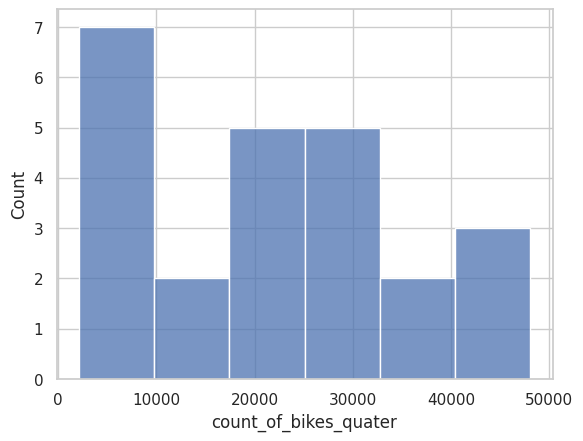

In [ ]:
sns.histplot(rental_dataframe.groupby(['start_hour']).sum()['count_of_bikes_quater'])

<Axes: xlabel='count_of_bikes_quater', ylabel='Distance_travelled'>

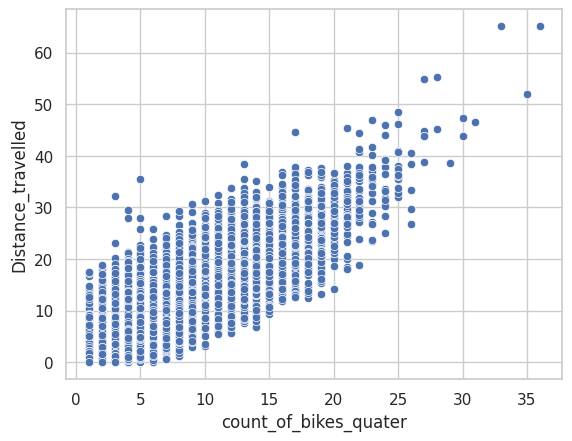

In [ ]:
sns.scatterplot(data= rental_dataframe, x='count_of_bikes_quater',y='Distance_travelled')

<Axes: xlabel='count_of_bikes_quater', ylabel='minutes_travelled'>

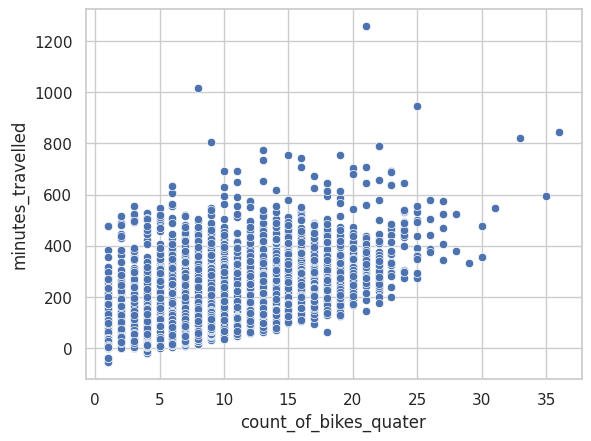

In [ ]:

sns.scatterplot(data= rental_dataframe, x='count_of_bikes_quater',y='minutes_travelled')

<Axes: xlabel='start_date', ylabel='count_of_bikes_quater'>

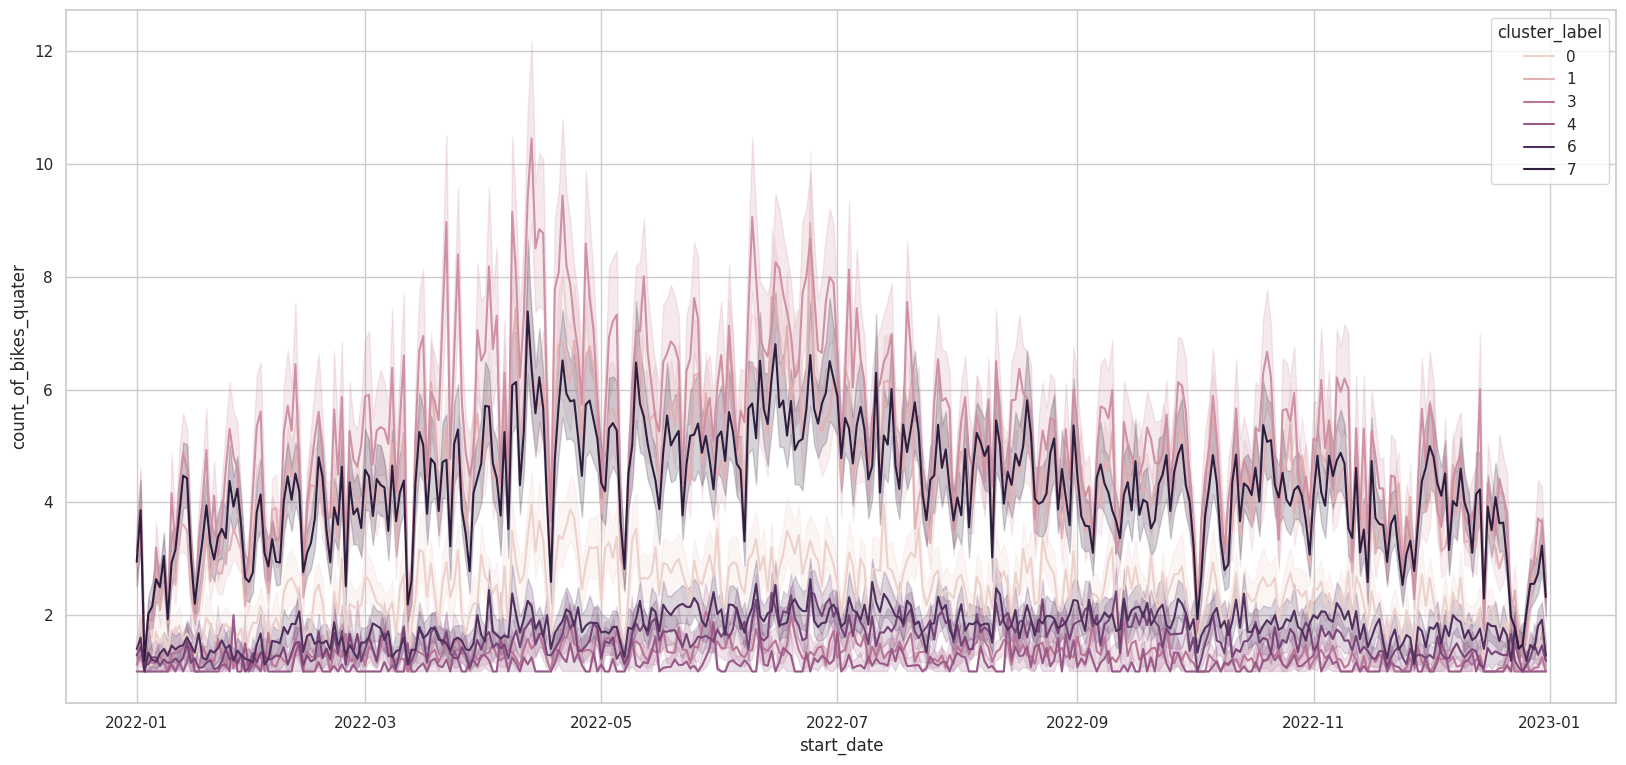

In [ ]:
plt.figure(figsize=(20,9))
sns.lineplot(data=rental_dataframe, x='start_date',y='count_of_bikes_quater',hue='cluster_label' )

This graphs shows that most number of rentals occur in the region of cluster 2 with an average of 4-6 rentals per hour

<Axes: xlabel='count_of_bikes_quater', ylabel='num_docks_available'>

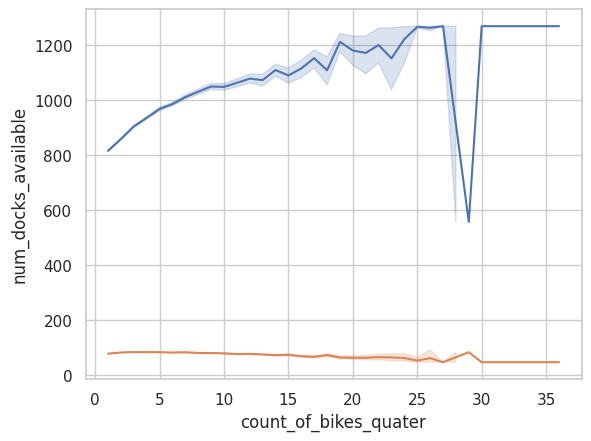

In [ ]:
sns.lineplot(data= rental_dataframe,y='num_docks_available',x='count_of_bikes_quater')
sns.lineplot(data= rental_dataframe,y='num_ebikes_available',x='count_of_bikes_quater')

<Figure size 2000x900 with 0 Axes>

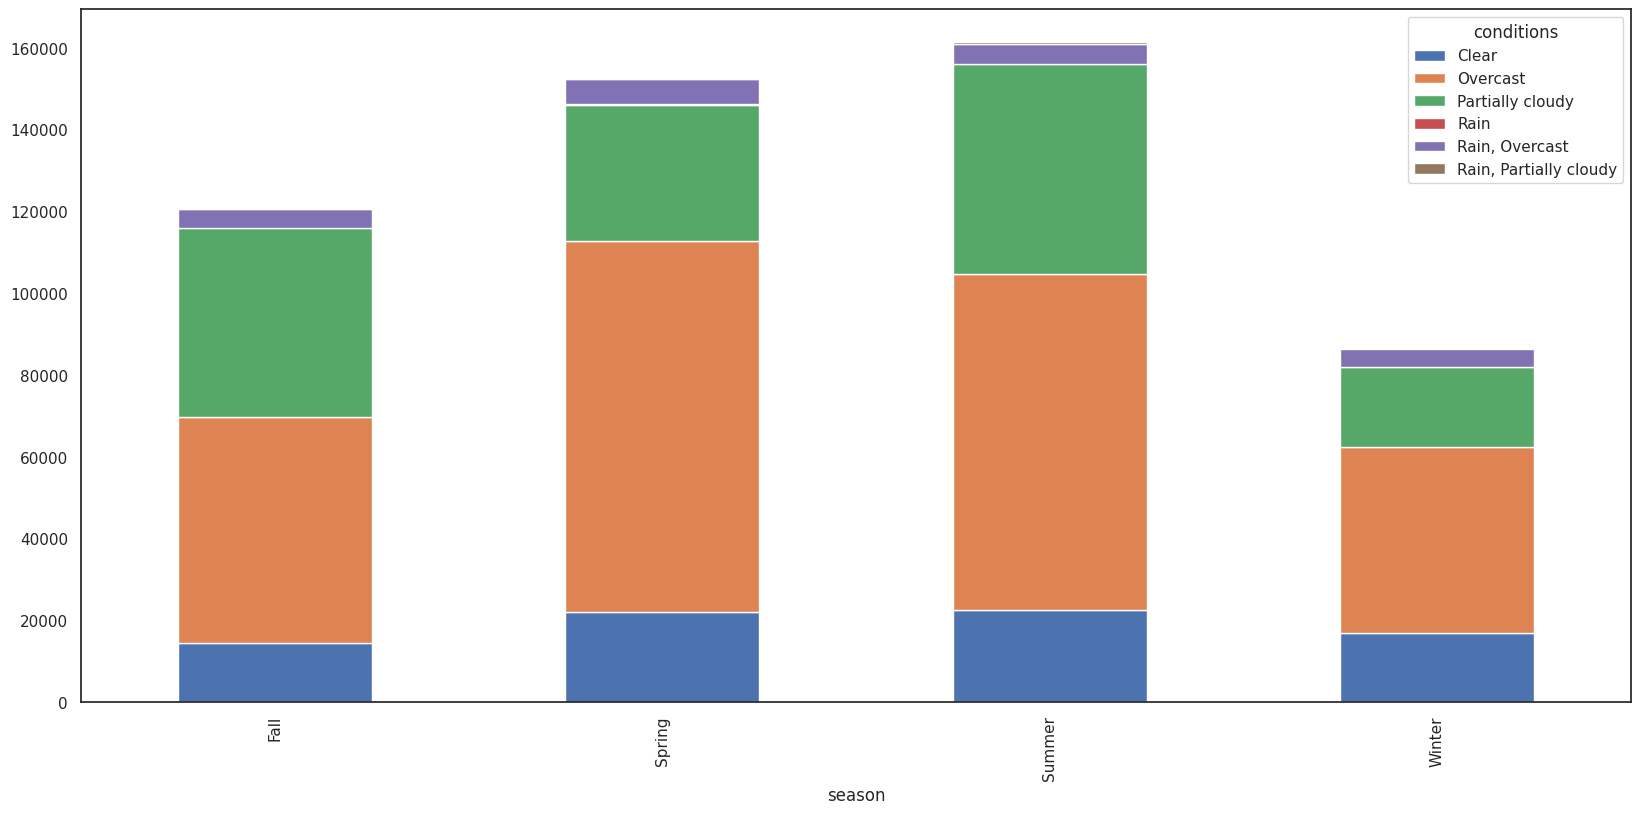

In [ ]:
plt.figure(figsize=(20,9))
rental_dataframe.groupby(['season', 'conditions']).sum()['count_of_bikes_quater'].unstack().plot(kind='bar', figsize=(20,9),stacked=True, legend=True)
plt.show()

Observing this graph it is evident that the summer months have the most number of rentals, most rentals are made when there is a slight cloudy weather

<Axes: xlabel='capacity', ylabel='count_of_bikes_quater'>

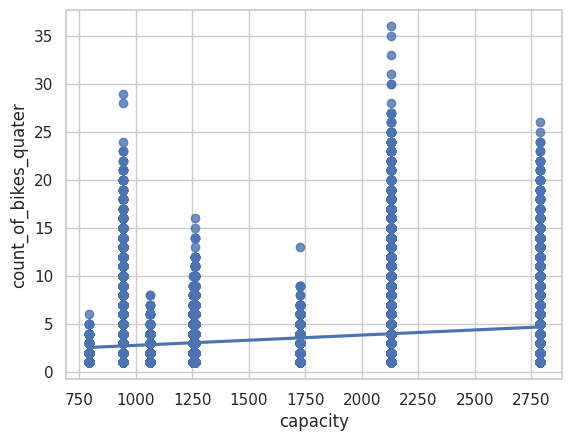

In [ ]:
plt.figure(figsize=(20,9))
sns.regplot(x='capacity', y='count_of_bikes_quater', data=rental_dataframe)

In [ ]:
abc = list(rental_dataframe.columns[9:18])
abc.append('count_of_bikes_quater')
abc

['wdir',
 'temp',
 'visibility',
 'wspd',
 'cloudcover',
 'precip',
 'solarradiation',
 'sealevelpressure',
 'humidity',
 'count_of_bikes_quater']

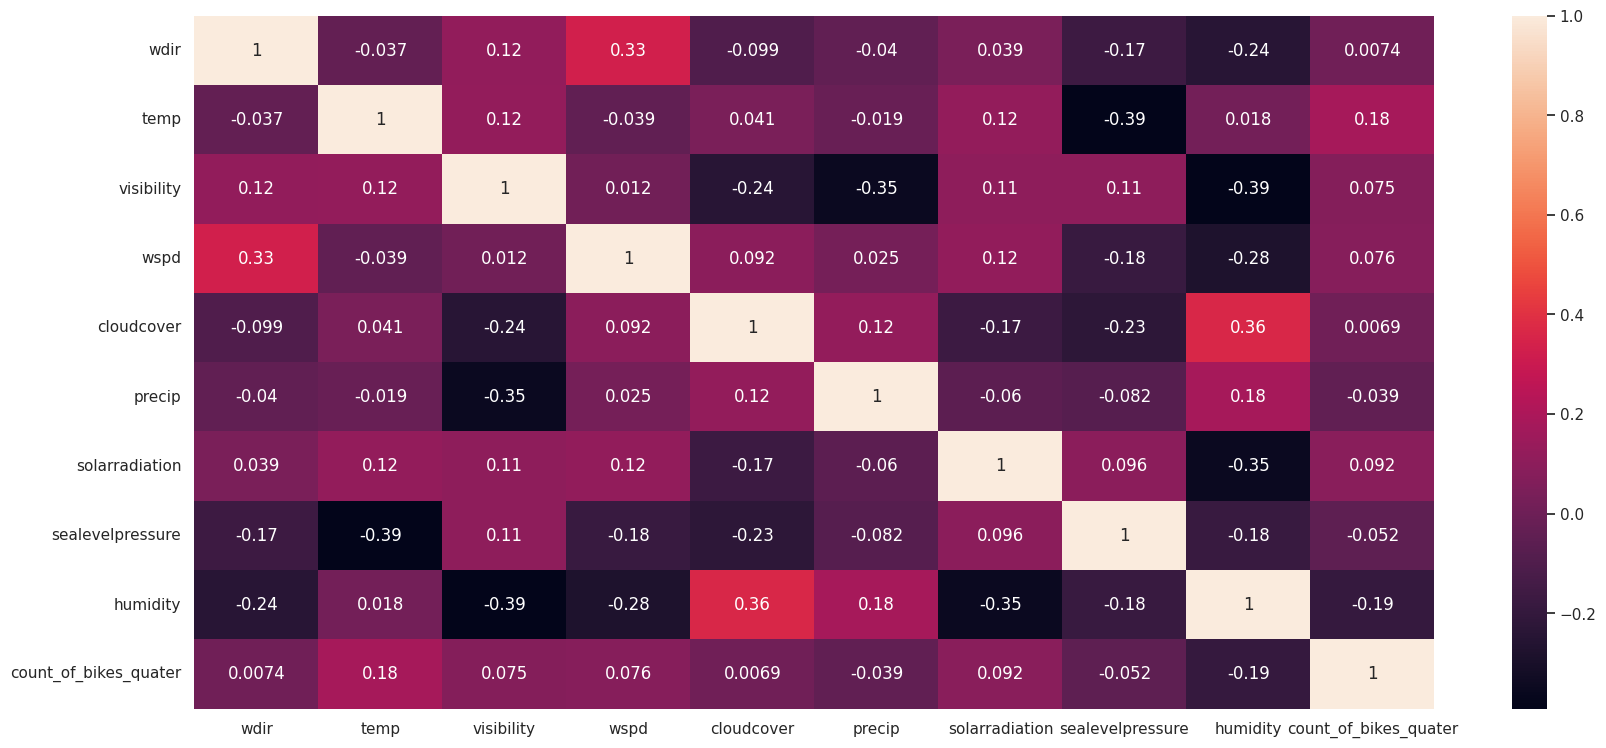

In [ ]:
plt.figure(figsize=(20,9))
sns.set_style("white")
x=rental_dataframe[abc]
sns.heatmap(x.corr(), fmt='.2g',annot=True)
plt.show()

All the variables when correlated against the count of bikes, does not show a significant amount of relation. the weather variables are mostly independent with each affecting at a certain tme

In [ ]:
rental_dataframe[['conditions','count_of_bikes_quater']].groupby('conditions').sum()

count_of_bikes_quater
conditions                                   
Clear                                   75992
Overcast                               273751
Partially cloudy                       150333
Rain                                      106
Rain, Overcast                          20275
Rain, Partially cloudy                    557

In [ ]:
sns.boxplot(x="conditions", y="count_of_bikes_quater", data=rental_dataframe[['conditions','count_of_bikes_quater']].groupby('conditions').sum().reset_index(drop=True))
plt.xticks(rotation=45)

ValueError: ignored

<Axes: xlabel='season', ylabel='count_of_bikes_quater'>

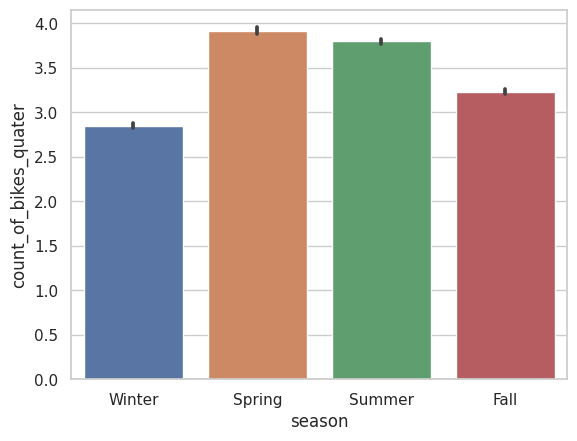

In [ ]:
sns.barplot(data=rental_dataframe, x='season',y='count_of_bikes_quater')

<Axes: xlabel='season', ylabel='count'>

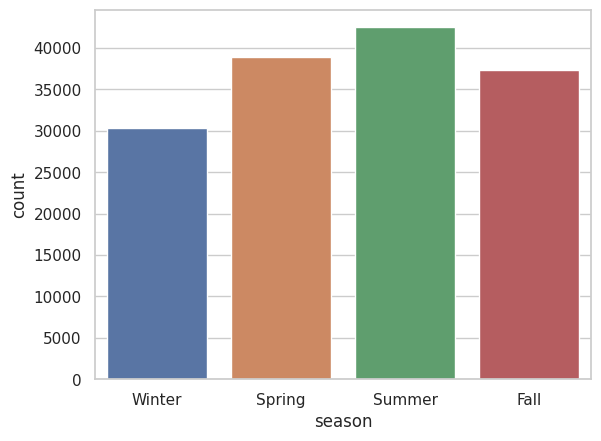

In [ ]:
sns.countplot(data=rental_dataframe, x='season')

In [ ]:
#plot histogram plots of weather data

In [ ]:
sns.pairplot(rental_dataframe[['count_of_bikes_quater','wdir','temp','visibility']])

<Axes: xlabel='temp', ylabel='count_of_bikes_quater'>

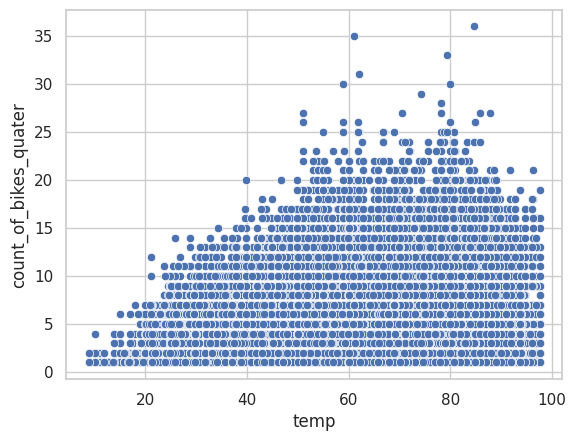

In [ ]:
sns.scatterplot(data= rental_dataframe, x='temp', y='count_of_bikes_quater')

In [ ]:
rental_dataframe.columns[9:18]

Index(['wdir', 'temp', 'visibility', 'wspd', 'cloudcover', 'precip',
       'solarradiation', 'sealevelpressure', 'humidity'],
      dtype='object')

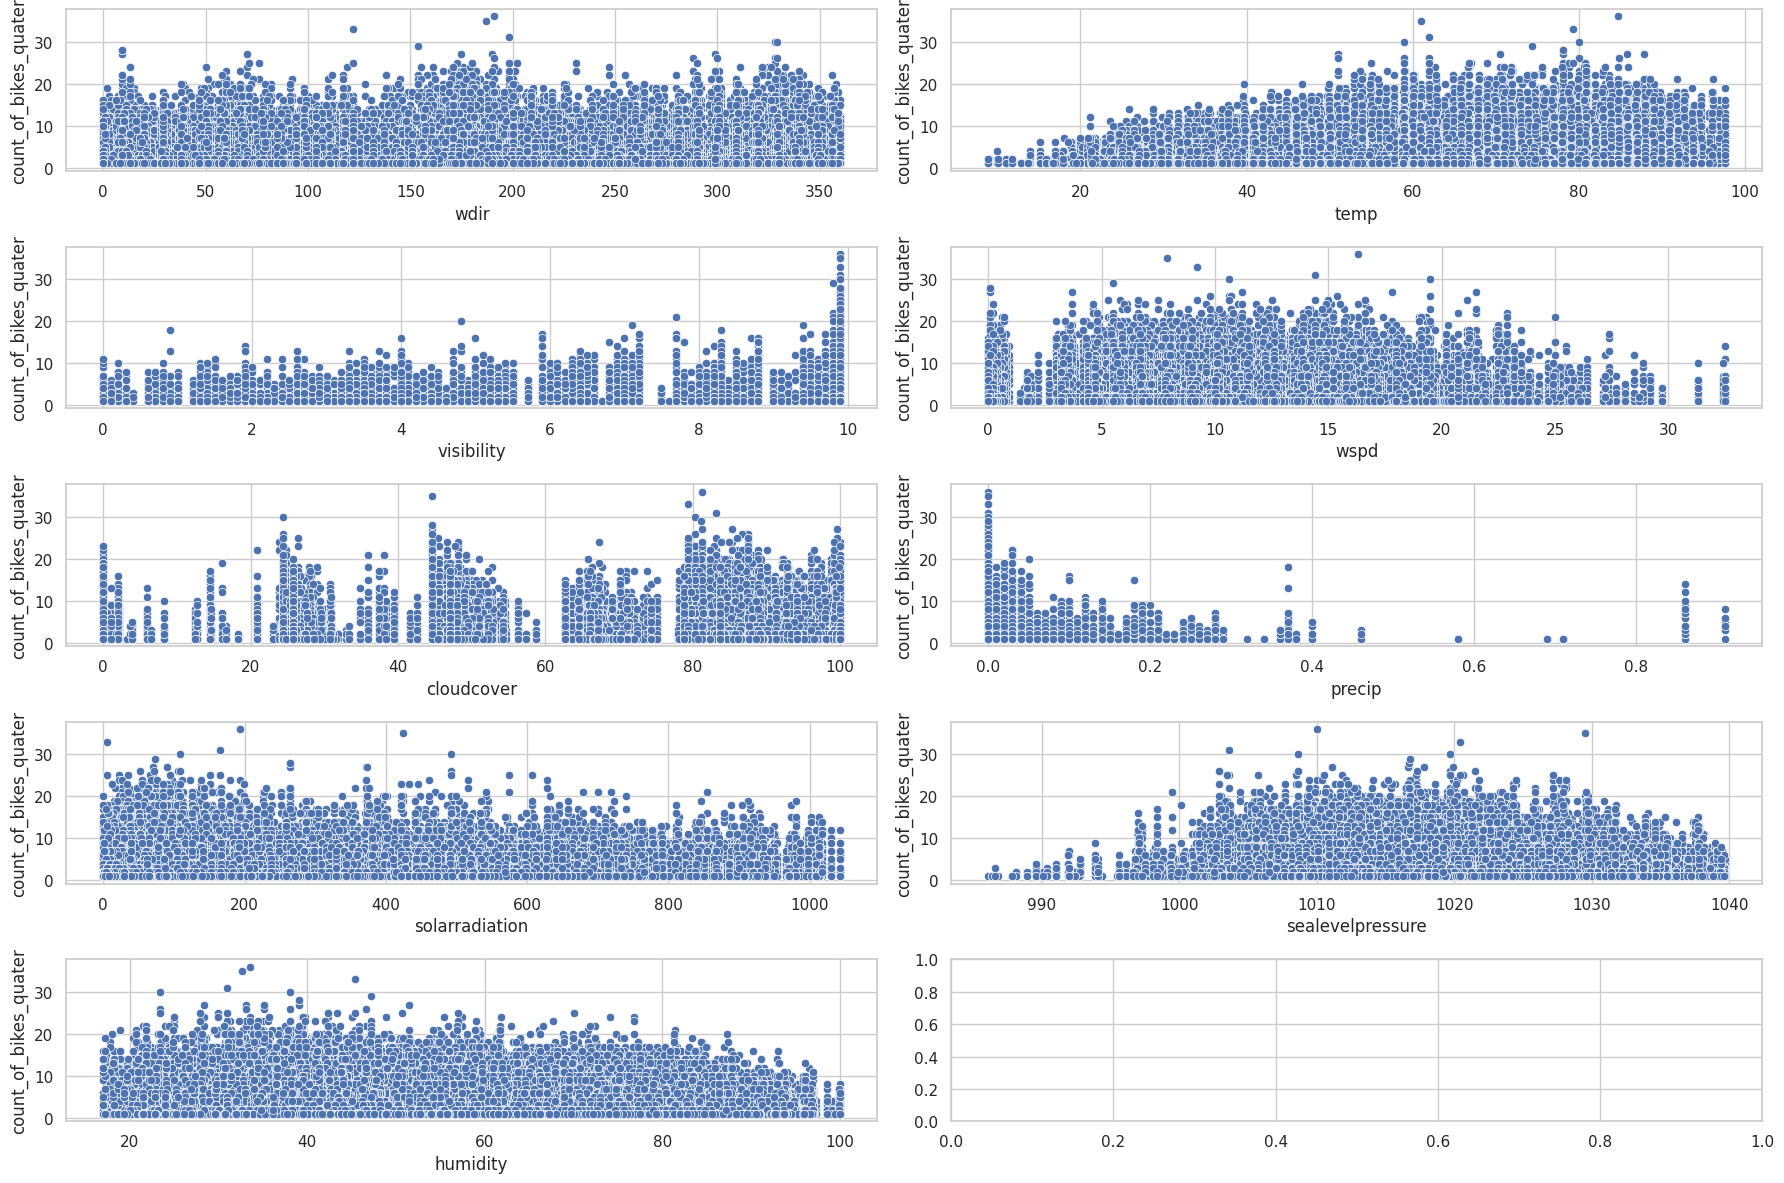

In [ ]:
column_names = rental_dataframe.columns[9:18]
  
num_plots = len(column_names)
num_rows = int(num_plots / 2) + (num_plots % 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(18, 12))

for i, column in enumerate(column_names):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.scatterplot(x=rental_dataframe[column], y=rental_dataframe['count_of_bikes_quater'], ax=ax)

# Adjust the layout of subplots
plt.tight_layout()
plt.show()

looking the distributions based on weather, it is evident that the fields like temperature, precipitation and solar radiation make the major part while making rental decisions

<Axes: xlabel='capacity', ylabel='count'>

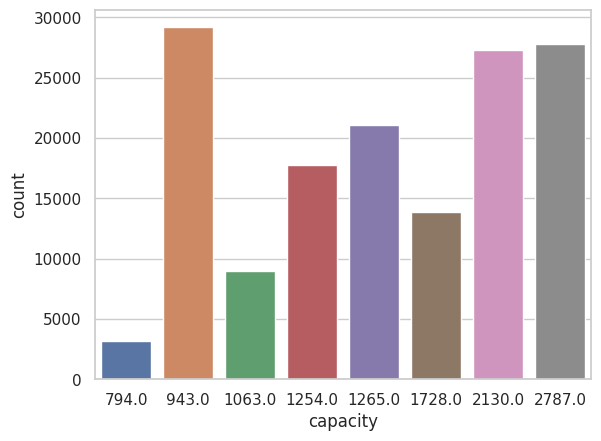

In [ ]:
sns.countplot(data=rental_dataframe,x='capacity')

In [ ]:
rental_dataframe['capacity']

0         1265.0
1         1265.0
2         1265.0
3         1265.0
4         1265.0
           ...  
149178     794.0
149179     794.0
149180     794.0
149181     794.0
149182     794.0
Name: capacity, Length: 149183, dtype: float64

<Axes: xlabel='wspd', ylabel='Count'>

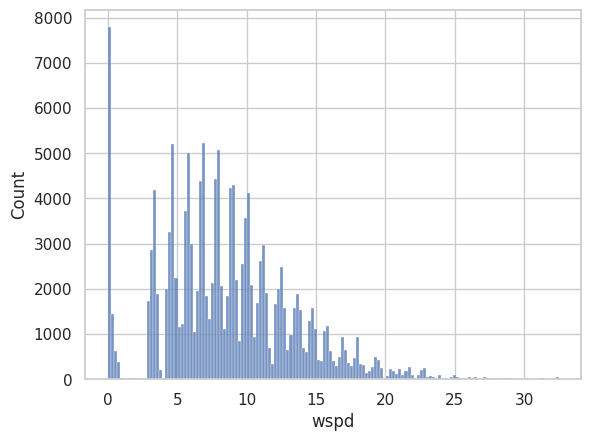

In [ ]:
sns.histplot(rental_dataframe['wspd'])

<Axes: xlabel='start_hour', ylabel='quater_hour'>

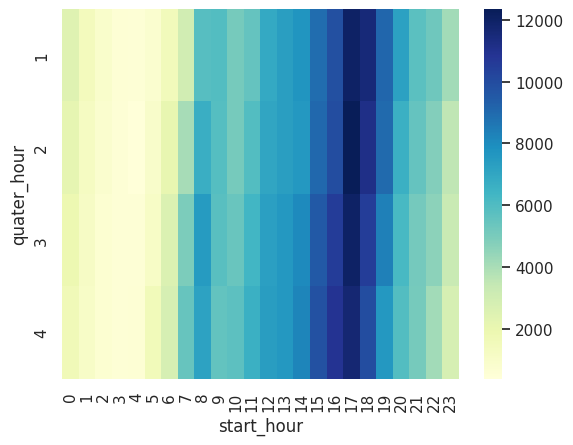

In [ ]:
rentals_by_time = rental_dataframe.pivot_table(values='count_of_bikes_quater', index='quater_hour', columns='start_hour', aggfunc='sum')

# Create the heatmap using Seaborn
sns.heatmap(rentals_by_time, cmap='YlGnBu')

In [ ]:
rental_dataframe['date'] = rental_dataframe['start_date'].dt.day
rental_dataframe['month'] = rental_dataframe['start_date'].dt.month
rental_dataframe['year'] = rental_dataframe['start_date'].dt.year

In [ ]:
rental_dataframe

start_date  cluster_label  start_hour  quater_hour  \
0      2022-01-01              0           0            1   
1      2022-01-01              0           0            2   
2      2022-01-01              0           1            1   
3      2022-01-01              0           1            4   
4      2022-01-01              0           2            1   
...           ...            ...         ...          ...   
149178 2022-12-30              4          10            1   
149179 2022-12-30              4          14            2   
149180 2022-12-30              4          21            3   
149181 2022-12-31              4           7            4   
149182 2022-12-31              4          15            3   

        count_of_bikes_quater  Distance_travelled  minutes_travelled  \
0                           1            2.915062                 16   
1                           2            0.673249                  8   
2                           1            0.401791                  4   
3                           3            7.625466                 54   
4                           1            3.158227                 17   
...                       ...                 ...                ...   
149178                      1            0.419780                 12   
149179                      1            0.366841                  6   
149180                      1            0.875454                  7   
149181                      1            0.878589                  5   
149182                      1            0.006919                100   

       Day_of_week  season   wdir  ...  sealevelpressure  humidity  \
0         Saturday  Winter  178.0  ...            1011.2     93.17   
1         Saturday  Winter  178.0  ...            1011.2     93.17   
2         Saturday  Winter  188.0  ...            1010.9     90.31   
3         Saturday  Winter  188.0  ...            1010.9     90.31   
4         Saturday  Winter  170.0  ...            1010.8     93.78   
...            ...     ...    ...  ...               ...       ...   
149178      Friday  Winter  182.0  ...            1026.9     74.81   
149179      Friday  Winter  161.0  ...            1023.0     45.93   
149180      Friday  Winter  193.0  ...            1022.5     82.73   
149181    Saturday  Winter  194.0  ...            1018.6     95.90   
149182    Saturday  Winter  190.0  ...            1012.5     93.65   

              conditions  num_docks_available  num_docks_disabled  \
0               Overcast                820.0                 2.0   
1               Overcast                820.0                 2.0   
2               Overcast                820.0                 2.0   
3               Overcast                820.0                 2.0   
4               Overcast                820.0                 2.0   
...                  ...                  ...                 ...   
149178  Partially cloudy                418.0                 0.0   
149179  Partially cloudy                418.0                 0.0   
149180          Overcast                418.0                 0.0   
149181          Overcast                418.0                 0.0   
149182          Overcast                418.0                 0.0   

        num_ebikes_available  capacity  date month  year  
0                       61.0    1265.0     1     1  2022  
1                       61.0    1265.0     1     1  2022  
2                       61.0    1265.0     1     1  2022  
3                       61.0    1265.0     1     1  2022  
4                       61.0    1265.0     1     1  2022  
...                      ...       ...   ...   ...   ...  
149178                  37.0     794.0    30    12  2022  
149179                  37.0     794.0    30    12  2022  
149180                  37.0     794.0    30    12  2022  
149181                  37.0     794.0    31    12  2022  
149182                  37.0     794.0    31    12  2022  

[149183 rows x 26 columns]

In [ ]:



# Select the categorical columns to be encoded
categorical_cols = ['Day_of_week', 'season','conditions']

# Perform one-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(rental_dataframe[categorical_cols]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names_out(categorical_cols)

# Perform label encoding
label_encoder = LabelEncoder()
label_encoded = rental_dataframe[categorical_cols].apply(label_encoder.fit_transform)

# Concatenate the encoded columns back to the original DataFrame
data_encoded = pd.concat([rental_dataframe, one_hot_encoded, label_encoded], axis=1)

# Drop the original categorical columns if needed
data_encoded.drop(categorical_cols, axis=1, inplace=True)


In [ ]:
data_encoded

start_date  cluster_label  start_hour  quater_hour  \
0      2022-01-01              0           0            1   
1      2022-01-01              0           0            2   
2      2022-01-01              0           1            1   
3      2022-01-01              0           1            4   
4      2022-01-01              0           2            1   
...           ...            ...         ...          ...   
149178 2022-12-30              4          10            1   
149179 2022-12-30              4          14            2   
149180 2022-12-30              4          21            3   
149181 2022-12-31              4           7            4   
149182 2022-12-31              4          15            3   

        count_of_bikes_quater  Distance_travelled  minutes_travelled   wdir  \
0                           1            2.915062                 16  178.0   
1                           2            0.673249                  8  178.0   
2                           1            0.401791                  4  188.0   
3                           3            7.625466                 54  188.0   
4                           1            3.158227                 17  170.0   
...                       ...                 ...                ...    ...   
149178                      1            0.419780                 12  182.0   
149179                      1            0.366841                  6  161.0   
149180                      1            0.875454                  7  193.0   
149181                      1            0.878589                  5  194.0   
149182                      1            0.006919                100  190.0   

        temp  visibility  ...  season_Fall  season_Spring  season_Summer  \
0       54.6         9.9  ...          0.0            0.0            0.0   
1       54.6         9.9  ...          0.0            0.0            0.0   
2       55.1         4.4  ...          0.0            0.0            0.0   
3       55.1         4.4  ...          0.0            0.0            0.0   
4       54.1         6.5  ...          0.0            0.0            0.0   
...      ...         ...  ...          ...            ...            ...   
149178  43.4         9.9  ...          0.0            0.0            0.0   
149179  62.2         9.9  ...          0.0            0.0            0.0   
149180  50.1         9.9  ...          0.0            0.0            0.0   
149181  51.0         0.3  ...          0.0            0.0            0.0   
149182  53.3         8.8  ...          0.0            0.0            0.0   

        season_Winter  conditions_Clear  conditions_Overcast  \
0                 1.0               0.0                  1.0   
1                 1.0               0.0                  1.0   
2                 1.0               0.0                  1.0   
3                 1.0               0.0                  1.0   
4                 1.0               0.0                  1.0   
...               ...               ...                  ...   
149178            1.0               0.0                  0.0   
149179            1.0               0.0                  0.0   
149180            1.0               0.0                  1.0   
149181            1.0               0.0                  1.0   
149182            1.0               0.0                  1.0   

        conditions_Partially cloudy  conditions_Rain  \
0                               0.0              0.0   
1                               0.0              0.0   
2                               0.0              0.0   
3                               0.0              0.0   
4                               0.0              0.0   
...                             ...              ...   
149178                          1.0              0.0   
149179                          1.0              0.0   
149180                          0.0              0.0   
149181                          0.0              0.0   
149182                     

In [ ]:
rental_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149183 entries, 0 to 149182
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   start_date             149183 non-null  datetime64[ns]
 1   cluster_label          149183 non-null  int64         
 2   start_hour             149183 non-null  int64         
 3   quater_hour            149183 non-null  int64         
 4   count_of_bikes_quater  149183 non-null  int64         
 5   Distance_travelled     149183 non-null  float64       
 6   minutes_travelled      149183 non-null  int64         
 7   Day_of_week            149183 non-null  object        
 8   season                 149183 non-null  object        
 9   wdir                   149161 non-null  float64       
 10  temp                   149183 non-null  float64       
 11  visibility             149183 non-null  float64       
 12  wspd                   149183 non-null  floa

In [ ]:


# Select the numeric columns to be normalized
numeric_cols = ['Distance_travelled', 'minutes_travelled','wdir','temp', 'visibility', 'wspd','cloudcover','precip','solarradiation','sealevelpressure','humidity','num_docks_available','num_docks_disabled','num_ebikes_available','capacity','temp', 'visibility', 'wspd']

# Perform scaling to a specific range
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_range = scaler.fit_transform(data_encoded[numeric_cols])
normalized_range = pd.DataFrame(normalized_range, columns=numeric_cols)

# Concatenate the normalized columns back to the original DataFrame
data_normalized = pd.concat([data_encoded.drop(numeric_cols,axis=1), normalized_range], axis=1)

# Drop the original numeric columns if needed

# Print the updated DataFrame
print(data_normalized.head())


  start_date  cluster_label  start_hour  quater_hour  count_of_bikes_quater  \
0 2022-01-01              0           0            1                      1   
1 2022-01-01              0           0            2                      2   
2 2022-01-01              0           1            1                      1   
3 2022-01-01              0           1            4                      3   
4 2022-01-01              0           2            1                      1   

   date  month  year  Day_of_week_Friday  Day_of_week_Monday  ...  \
0     1      1  2022                 0.0                 0.0  ...   
1     1      1  2022                 0.0                 0.0  ...   
2     1      1  2022                 0.0                 0.0  ...   
3     1      1  2022                 0.0                 0.0  ...   
4     1      1  2022                 0.0                 0.0  ...   

   solarradiation  sealevelpressure  humidity  num_docks_available  \
0        0.004794          0.468284  0.9

In [ ]:
data_normalized.head()

start_date  cluster_label  start_hour  quater_hour  count_of_bikes_quater  \
0 2022-01-01              0           0            1                      1   
1 2022-01-01              0           0            2                      2   
2 2022-01-01              0           1            1                      1   
3 2022-01-01              0           1            4                      3   
4 2022-01-01              0           2            1                      1   

   date  month  year  Day_of_week_Friday  Day_of_week_Monday  ...  \
0     1      1  2022                 0.0                 0.0  ...   
1     1      1  2022                 0.0                 0.0  ...   
2     1      1  2022                 0.0                 0.0  ...   
3     1      1  2022                 0.0                 0.0  ...   
4     1      1  2022                 0.0                 0.0  ...   

   solarradiation  sealevelpressure  humidity  num_docks_available  \
0        0.004794          0.468284  0.917681             0.472385   
1        0.004794          0.468284  0.917681             0.472385   
2        0.004794          0.462687  0.883211             0.472385   
3        0.004794          0.462687  0.883211             0.472385   
4        0.004794          0.460821  0.925033             0.472385   

   num_docks_disabled  num_ebikes_available  capacity      temp  visibility  \
0            0.222222              0.347826  0.236327  0.515220    1.000000   
1            0.222222              0.347826  0.236327  0.515220    1.000000   
2            0.222222              0.347826  0.236327  0.520857    0.444444   
3            0.222222              0.347826  0.236327  0.520857    0.444444   
4            0.222222              0.347826  0.236327  0.509583    0.656566   

       wspd  
0  0.178462  
1  0.178462  
2  0.181538  
3  0.181538  
4  0.249231  

[5 rows x 43 columns]

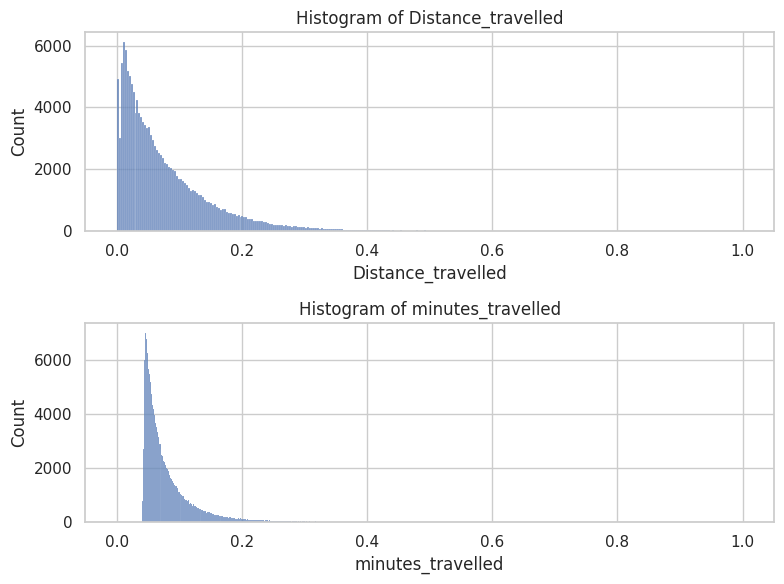

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot histogram for 'Distance_travelled'
sns.histplot(data_normalized['Distance_travelled'], ax=axs[0])
axs[0].set_title('Histogram of Distance_travelled')

# Plot histogram for 'minutes_travelled'
sns.histplot(data_normalized['minutes_travelled'], ax=axs[1])
axs[1].set_title('Histogram of minutes_travelled')

# Adjust the layout of subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
data_normalized.drop('start_date',axis=1,inplace=True)

In [ ]:

# Shuffle the data
shuffled_data = shuffle(data_normalized).reset_index(drop=True)

print(shuffled_data.shape)
# Print the shuffled data
shuffled_data.head()


(149183, 42)


cluster_label  start_hour  quater_hour  count_of_bikes_quater  date  month  \
0              1          14            4                      5    24     10   
1              6           6            1                      1    16      5   
2              2          14            3                     12    23      4   
3              7           8            1                     11    26      7   
4              2          10            1                      4    27      4   

   year  Day_of_week_Friday  Day_of_week_Monday  Day_of_week_Saturday  ...  \
0  2022                 0.0                 1.0                   0.0  ...   
1  2022                 0.0                 1.0                   0.0  ...   
2  2022                 0.0                 0.0                   1.0  ...   
3  2022                 0.0                 0.0                   0.0  ...   
4  2022                 0.0                 0.0                   0.0  ...   

   solarradiation  sealevelpressure  humidity  num_docks_available  \
0        0.291467          0.639925  0.673979             0.965922   
1        0.006711          0.389925  0.923587             0.401880   
2        0.724832          0.723881  0.287694             1.000000   
3        0.015340          0.576493  0.637339             0.163337   
4        0.108341          0.621269  0.255514             1.000000   

   num_docks_disabled  num_ebikes_available  capacity      temp  visibility  \
0            0.777778              1.000000  1.000000  0.630214    1.000000   
1            0.666667              0.717391  0.230808  0.630214    0.969697   
2            1.000000              0.195652  0.670346  0.722661    1.000000   
3            0.444444              0.586957  0.074762  0.777903    1.000000   
4            1.000000              0.195652  0.670346  0.506201    1.000000   

       wspd  
0  0.246154  
1  0.092308  
2  0.252308  
3  0.233846  
4  0.541538  

[5 rows x 42 columns]

In [ ]:
shuffled_data.dropna(inplace=True)

In [ ]:
X = shuffled_data.drop('count_of_bikes_quater',axis=1)
y = shuffled_data['count_of_bikes_quater']

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
# adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_model(model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  # adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  # print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  # adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  y_predict = model.predict(X_test)
  plt.figure(figsize = (10, 10))
  sns.regplot(y_test, y_predict, color = 'brown')
  plt.title('Y_test Vs Y_predictions', fontsize = 15, color = 'brown')
  plt.show()

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    # adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    # print("Adjusted R2 : ",adj_r2)

    # train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    # adj_r2_list.append(adj_r2)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names based on their importance rank
    feature_names = X_train.columns[indices]

    print(feature_names)
    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

#### Linear Regression

MSE : 414.98132399574905
RMSE : 20.371090397810054
R2 : 0.7847564616011757

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



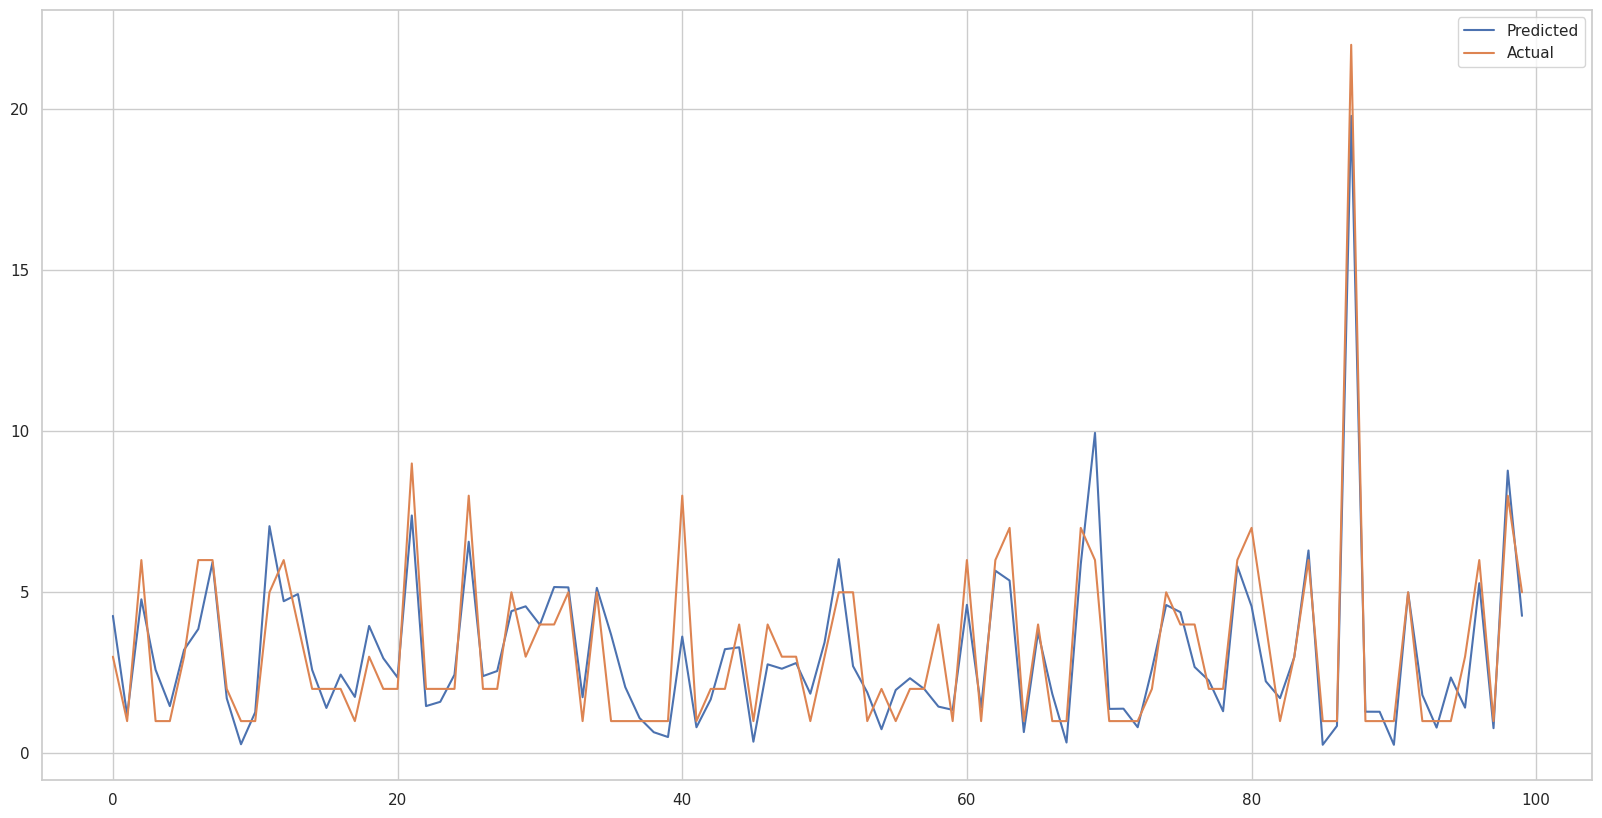

In [ ]:
linear_model= LinearRegression()
train_model(linear_model, X_train, y_train, X_test, y_test)

In [ ]:
x

#### KNN regression


================Evalution Matrix=========================

MSE : 4.698329088615971
RMSE : 2.167562937636638
R2 : 0.5184173052130958

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



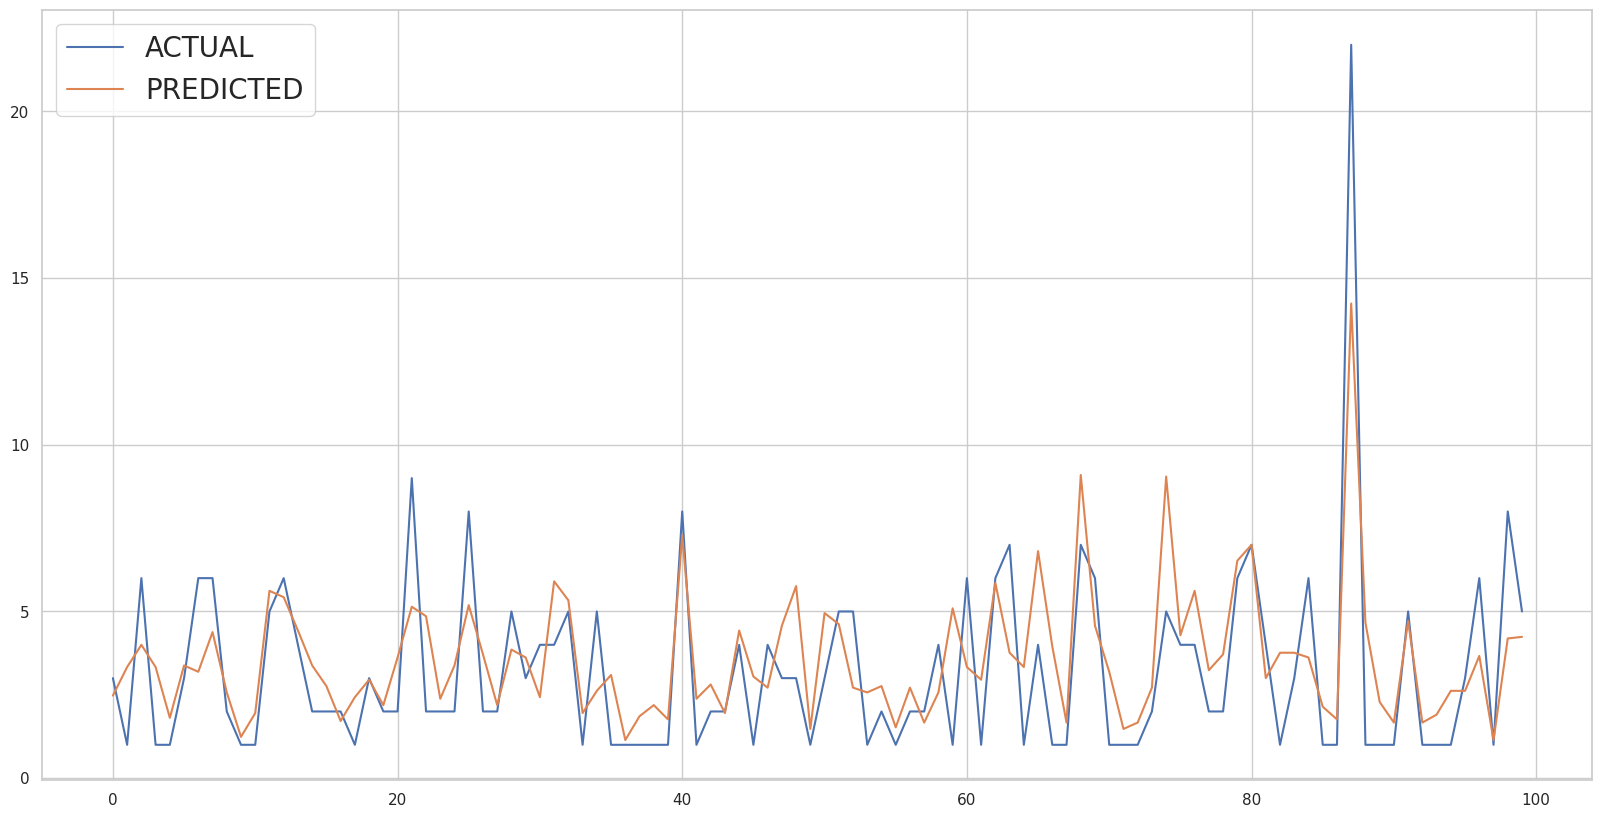

In [ ]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train,y_train,X_test,y_test)

#### RandomForest Regression

In [ ]:
rf_model = RandomForestRegressor()


In [ ]:
# creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 1.3425534877484666
RMSE : 1.1586861040629022
R2 : 0.8623871350152861

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



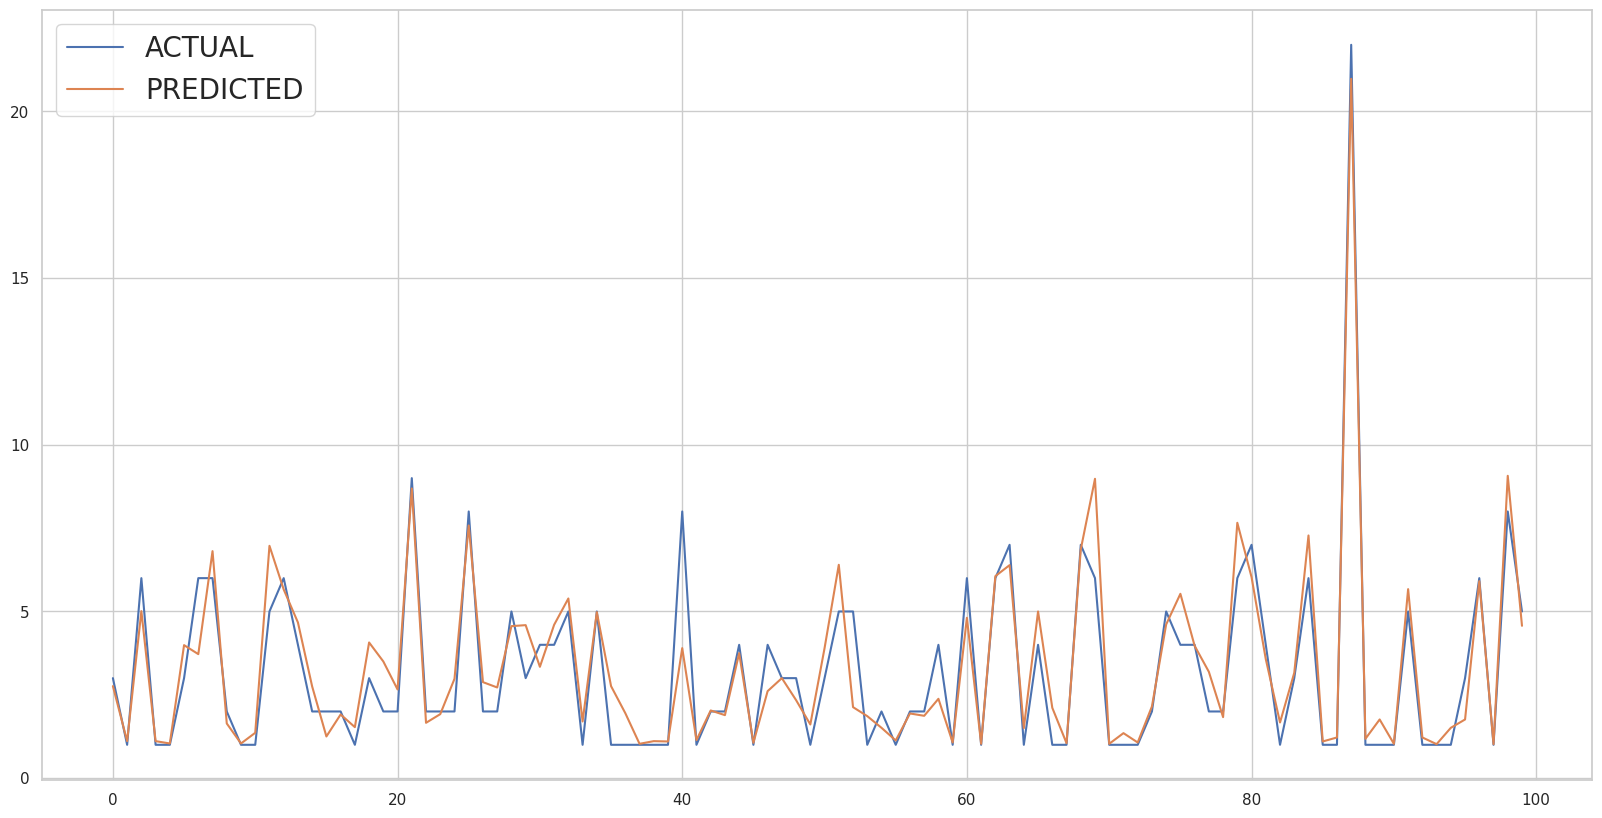

In [ ]:
run_model(rf_model,X_train,y_train,X_test,y_test)


In [ ]:
optimal_rf_model=rf_grid.best_estimator_

NameError: ignored

In [ ]:
get_features_importance(optimal_rf_model,X_train)

#### Gradient Boosting regressor

In [ ]:
gb_model=GradientBoostingRegressor()

In [ ]:
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
gb_grid= RandomizedSearchCV(gb_model,param_distributions=params,verbose=0)


================Evalution Matrix=========================

MSE : 1.372411349351133
RMSE : 1.171499615600079
R2 : 0.8593266790148696

================Evalution Matrix=========================

Index(['Distance_travelled', 'minutes_travelled', 'num_docks_available',
       'num_docks_disabled', 'cluster_label', 'start_hour',
       'num_ebikes_available', 'capacity', 'month', 'solarradiation',
       'Day_of_week_Saturday', 'humidity', 'Day_of_week_Sunday', 'temp',
       'quater_hour', 'temp', 'conditions_Rain, Overcast', 'date',
       'sealevelpressure', 'season_Summer', 'precip', 'conditions_Overcast',
       'cloudcover', 'wspd', 'wdir', 'season_Winter', 'Day_of_week_Monday',
       'wspd', 'visibility', 'conditions_Rain, Partially cloudy', 'year',
       'Day_of_week_Friday', 'visibility', 'conditions_Clear',
       'conditions_Partially cloudy', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'season_Fall',
       'season_Spring', 'conditions_Rain']

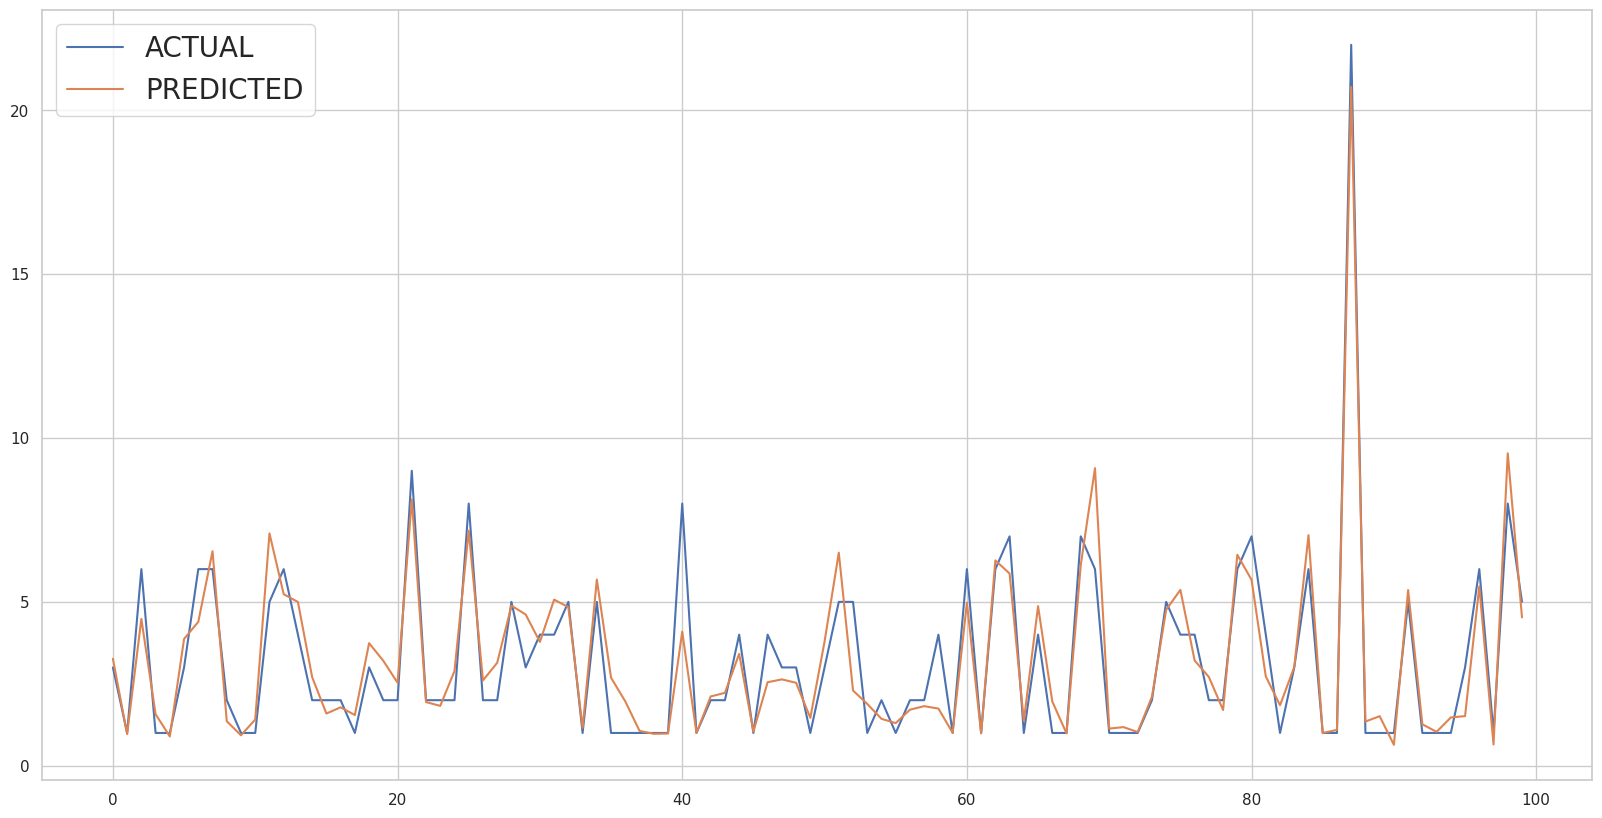

In [ ]:
run_model(gb_model,X_train,y_train,X_test,y_test) 

In [ ]:
optimal_gb_model=gb_grid.best_estimator_

In [ ]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

As you can see, after running the models. As expected the random forest and gradient boosting algorithms worked better compared to the other models. As random forest has an inbuilt feature selector, the ensemble methods have shown a good result